# Exploratory Data Analysis (EDA) & RFMT Analysis

# Purpose
This notebook performs Exploratory Data Analysis (EDA) and RFMT (Recency, Frequency, Monetary, and Tenure) analysis on customer transactions. The goal is to identify customer segments and derive insights for better decision-making.

# Key Objectives
1. **Understand the dataset**: Perform initial data inspection and cleaning.
2. **Explore key metrics**: Analyze transaction behavior using RFMT methodology.
3. **Visualize insights**: Use data visualizations to highlight patterns.
4. **Segment customers**: Apply clustering techniques based on RFMT scores.
5. **Business Implications**: Translate insights into actionable recommendations.


# Start - Required Imports

In [1]:
# Set environment variables to optimize computation
import os
os.environ["OMP_NUM_THREADS"] = '4'  # Limit CPU threads for efficiency

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load dataset
file_path = "Customer RFMT Activity Dataset.csv"
original_data = pd.read_csv(file_path)

# Create a working copy of the dataset
data = original_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78513 entries, 0 to 78512
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cid                         78513 non-null  object 
 1   account_type                78513 non-null  object 
 2   user_account_type           77605 non-null  object 
 3   client_tenure_months        78513 non-null  int64  
 4   trade_freq                  6200 non-null   float64
 5   last90days_trade_freq       6200 non-null   float64
 6   buy_trade_freq              6200 non-null   float64
 7   sell_trade_freq             6200 non-null   float64
 8   trade_recency_months        6200 non-null   float64
 9   trade_tenure_months         6200 non-null   float64
 10  trade_value                 6200 non-null   float64
 11  available_balance           22478 non-null  float64
 12  cash_advance_balance        22478 non-null  float64
 13  deposit_freq                859

In [3]:
# Check for missing values
data.isnull().sum()

cid                               0
account_type                      0
user_account_type               908
client_tenure_months              0
trade_freq                    72313
last90days_trade_freq         72313
buy_trade_freq                72313
sell_trade_freq               72313
trade_recency_months          72313
trade_tenure_months           72313
trade_value                   72313
available_balance             56035
cash_advance_balance          56035
deposit_freq                  69919
last90days_deposit_freq       69919
deposit_recency_months        70489
deposit_tenure_months         70489
deposit_amount                70489
withdrawal_freq               69919
last90days_withdrawal_freq    69919
withdrawal_recency_months     74327
withdrawal_tenure_months      74327
withdrawal_amount             74327
loan_freq                     78453
loan_recency_months           78453
loan_tenure_months            78453
loan_value_collected          78453
dtype: int64

# Exploratory Data Analysis (EDA)
This section focuses on data cleaning and preprocessing to ensure consistency and reliability for further analysis.

### Handling Missing Values

In [4]:
# Handle missing values: Fill NaNs in numeric columns with zero
data.iloc[:, 3:] = data.iloc[:, 3:].fillna(0)

# Display dataset summary
data.describe()

,cid,account_type,user_account_type,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,...,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
0,1000100001,Investor,NaN,41,2.0,0.0,1.0,1.0,33.0,33.0,...,900000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10022222,Client,Individual,39,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002444444,Client,NaN,39,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3300110000,Broker-Dealer,Corporate,19,76.0,14.0,38.0,38.0,1.0,19.0,...,1328124.0,1.0,1.0,1.0,1.0,2400000.0,1.0,10.0,10.0,50000000.0
4,3300110006,Investor,Individual,14,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking & Removing Duplicates
Duplicate customer IDs are identified and removed while keeping the first occurrence.

In [6]:
# Check for duplicate customer IDs
duplicate_count = data['client_id'].duplicated().sum()
print(f"Number of duplicate customer IDs: {duplicate_count}")

1

In [7]:
# Remove duplicates while keeping the first occurrence
no_dup_data = data.drop_duplicates(subset=['client_id'], keep='first')

0

In [8]:
# Confirm duplicates are removed
print(f"Number of duplicate customer IDs after removal: {no_dup_data['client_id'].duplicated().sum()}")

cid                             0
account_type                    0
user_account_type             908
client_tenure_months            0
trade_freq                      0
last90days_trade_freq           0
buy_trade_freq                  0
sell_trade_freq                 0
trade_recency_months            0
trade_tenure_months             0
trade_value                     0
available_balance               0
cash_advance_balance            0
deposit_freq                    0
last90days_deposit_freq         0
deposit_recency_months          0
deposit_tenure_months           0
deposit_amount                  0
withdrawal_freq                 0
last90days_withdrawal_freq      0
withdrawal_recency_months       0
withdrawal_tenure_months        0
withdrawal_amount               0
loan_freq                       0
loan_recency_months             0
loan_tenure_months              0
loan_value_collected            0
dtype: int64

### Dropping Unnecessary Columns
Records with null user_type values (approximately 1.2%) are removed to ensure segmentation accuracy.

In [9]:
semi_final_data = no_dup_data.dropna(subset = ['user_type'])
semi_final_data.shape

(77604, 27)

In [10]:
# Categorical features are also removed, leaving only relevant numerical data

final_data = semi_final_data.iloc[:, 3:]
final_data.shape

(77604, 24)

### Ensuring Data Consistency

In [ ]:
# Tenure columns are rounded to whole numbers for consistency in numerical analysis.
final_data[['client_tenure_months', 'trade_tenure_months']] = final_data[['client_tenure_months', 'trade_tenure_months']].round(0)


### Final Data Overview

In [ ]:
final_data.info()
final_data.describe()
final_data.head()

# Clustering - All Clients
This section performs feature transformation, clustering, and outlier detection to segment clients effectively.

### Feature Transformation - Normalization
Normalize features to prepare them for clustering.

In [12]:
# Instantiate StandardScaler and fit to data
scaler = StandardScaler()
scaler.fit(final_data)

StandardScaler()

In [13]:
# Transform the data
transformed_data = scaler.transform(final_data)
transformed_data

array([[ 1.79044195e+00, -3.77493387e-02, -3.04478500e-02, ...,
        -2.09749004e-02, -2.34160650e-02, -7.18311820e-03],
       [-3.46352048e-01,  4.69015994e+00,  8.04775712e+00, ...,
         2.64462799e+01,  1.94951694e+01,  1.75597187e-01],
       [-8.80550547e-01, -3.77493387e-02, -3.04478500e-02, ...,
        -2.09749004e-02, -2.34160650e-02, -7.18311820e-03],
       ...,
       [-2.37630634e+00, -3.77493387e-02, -3.04478500e-02, ...,
        -2.09749004e-02, -2.34160650e-02, -7.18311820e-03],
       [-2.37630634e+00, -3.77493387e-02, -3.04478500e-02, ...,
        -2.09749004e-02, -2.34160650e-02, -7.18311820e-03],
       [-2.37630634e+00, -3.77493387e-02, -3.04478500e-02, ...,
        -2.09749004e-02, -2.34160650e-02, -7.18311820e-03]])

In [14]:
# Convert to DataFrame for better readability
pd_trans_data = pd.DataFrame(transformed_data)

# Summary statistics of the transformed data
pd_trans_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,7.760400e+04,7.760400e+04,7.760400e+04,7.760400e+04,7.760400e+04,7.760400e+04,7.760400e+04,77604.000000,7.760400e+04,7.760400e+04,...,7.760400e+04,7.760400e+04,7.760400e+04,7.760400e+04,7.760400e+04,7.760400e+04,7.760400e+04,7.760400e+04,7.760400e+04,7.760400e+04
mean,-1.054772e-16,-2.105882e-18,-2.197442e-18,-1.574833e-17,-3.845523e-18,-1.464961e-17,5.420356e-17,0.000000,-7.324805e-19,2.197442e-18,...,7.324805e-19,1.410025e-17,1.318465e-17,-7.178309e-17,4.394883e-17,-2.014321e-18,-5.424934e-18,6.317645e-18,1.849513e-17,4.578003e-19
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.376306e+00,-3.774934e-02,-3.044785e-02,-4.259961e-02,-3.000629e-02,-2.545343e-01,-2.690424e-01,-0.010783,-8.545535e+01,-1.402044e-02,...,-7.339987e-03,-8.683015e-02,-4.431069e-02,-2.091981e-01,-2.163678e-01,-8.613330e-03,-1.328226e-02,-2.097490e-02,-2.341606e-02,-7.183118e-03
25%,-5.600314e-01,-3.774934e-02,-3.044785e-02,-4.259961e-02,-3.000629e-02,-2.545343e-01,-2.690424e-01,-0.010783,-3.910249e-03,-1.402044e-02,...,-7.339987e-03,-8.683015e-02,-4.431069e-02,-2.091981e-01,-2.163678e-01,-8.613330e-03,-1.328226e-02,-2.097490e-02,-2.341606e-02,-7.183118e-03
50%,-1.326726e-01,-3.774934e-02,-3.044785e-02,-4.259961e-02,-3.000629e-02,-2.545343e-01,-2.690424e-01,-0.010783,-3.910249e-03,-1.402044e-02,...,-7.339987e-03,-8.683015e-02,-4.431069e-02,-2.091981e-01,-2.163678e-01,-8.613330e-03,-1.328226e-02,-2.097490e-02,-2.341606e-02,-7.183118e-03
75%,8.100675e-02,-3.774934e-02,-3.044785e-02,-4.259961e-02,-3.000629e-02,-2.545343e-01,-2.690424e-01,-0.010783,-3.910249e-03,-1.402044e-02,...,-7.339987e-03,-8.683015e-02,-4.431069e-02,-2.091981e-01,-2.163678e-01,-8.613330e-03,-1.328226e-02,-2.097490e-02,-2.341606e-02,-7.183118e-03
max,2.538320e+00,2.020182e+02,1.851913e+02,1.668577e+02,2.298841e+02,9.894463e+00,8.384355e+00,166.731486,2.340004e+02,1.838201e+02,...,2.323618e+02,1.702474e+02,1.131361e+02,1.109361e+01,1.000101e+01,2.323835e+02,1.684758e+02,8.732097e+01,6.829163e+01,2.659440e+02


### Determining Optimal Number of Clusters
Use the elbow method to fpers the best cluster count by plotting Sum of Squared Errors (SSE).

#### **<u>First Analysis</u>**

c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

Text(0, 0.5, 'SSE')

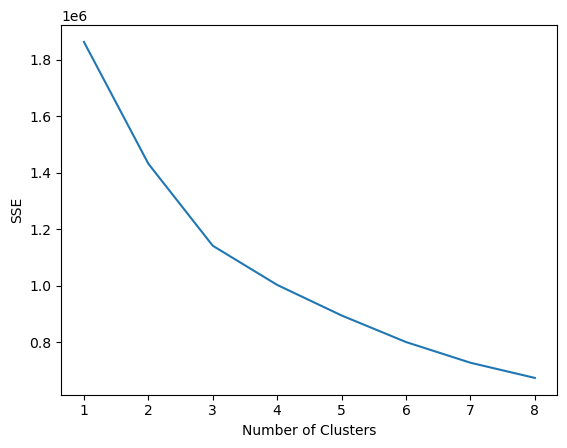

In [15]:
# To get an idea of the optimal number of clusters, we plot an elbow graph that shows this.

numClusters = [1,2,3,4,5,6,7,8]
SSE = [] # sum-of-squared errors (SSE)

for k in numClusters:
    k_means = KMeans(n_clusters=k)
    k_means.fit(transformed_data)
    SSE.append(k_means.inertia_)

In [ ]:
# Plot the elbow graph
plt.plot(numClusters, SSE, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [16]:
# Display SSE values for each cluster
print("Clusters:", numClusters)
print("SSE:     ", SSE)

Clusters: [1, 2, 3, 4, 5, 6, 7, 8]
SSE:      [1862495.9999998515, 1431586.6889944044, 1141342.250623735, 1002784.5568967556, 894654.0221788252, 800664.1476923384, 727459.5001894056, 673742.3682514512]


The elbow graph suggests that 3 clusters is the optimal choice.

##### **Applying K-Means Clustering**

In [17]:
# Fit K-Means model with 3 clusters
model = KMeans(n_clusters=3, random_state=42)
model.fit(transformed_data)

# Assign cluster labels to the dataset
semi_final_data['Cluster'] = model.labels_

# Display cluster distribution
semi_final_data.Cluster.value_counts()

c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\OluwatomisinSoetan\AppData\Local\Temp\ipykernel_29044\4268718110.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi_final_data['Cluster'] = model.labels_


,cid,account_type,user_account_type,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,...,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Cluster
1,10022222,Client,Individual,39,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3300110000,Broker-Dealer,Corporate,19,76.0,14.0,38.0,38.0,1.0,19.0,...,1.0,1.0,1.0,1.0,2400000.0,1.0,10.0,10.0,50000000.0,2
4,3300110006,Investor,Individual,14,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3300110131,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,4000110002,Investor,Individual,46,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78508,9900187460,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78509,9900187461,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78510,9900187462,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78511,9900187463,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


##### **Reviewing Cluster Composition**
Identify potential outliers within the clusters.

In [18]:
print("Cluster 0:")
display(semi_final_data[semi_final_data.Cluster == 0].tail(3))

print("Cluster 1:")
display(semi_final_data[semi_final_data.Cluster == 1].head())

print("Cluster 2:")
display(semi_final_data[semi_final_data.Cluster == 2].head(3))


Cluster
0    71045
2     6558
1        1
Name: count, dtype: int64

##### **Handling Outliers**
Remove specific outliers for improved segmentation accuracy.

In [20]:
# Exclude identified outliers
edited_semi_final_data = semi_final_data[~semi_final_data['client_id'].isin(['9900116037'])]

# Verify the dataset after removing outliers
edited_semi_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77603 entries, 1 to 78512
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cid                         77603 non-null  object 
 1   account_type                77603 non-null  object 
 2   user_account_type           77603 non-null  object 
 3   client_tenure_months        77603 non-null  int64  
 4   trade_freq                  77603 non-null  float64
 5   last90days_trade_freq       77603 non-null  float64
 6   buy_trade_freq              77603 non-null  float64
 7   sell_trade_freq             77603 non-null  float64
 8   trade_recency_months        77603 non-null  float64
 9   trade_tenure_months         77603 non-null  float64
 10  trade_value                 77603 non-null  float64
 11  available_balance           77603 non-null  float64
 12  cash_advance_balance        77603 non-null  float64
 13  deposit_freq                77603 no

#### **<u>Second Analysis: Refining the Clusters</u>**
This section refines the clustering analysis by removing categorical features, re-normalizing the data, and testing different cluster configurations.

##### **Removing Categorical Features**
Exclude categorical columns at the start of the table to focus only on numerical features.

In [21]:
# Remove categorical columns from the dataset
edited_final_data = edited_semi_final_data.iloc[:, 3:]

# Display first few rows
edited_final_data.head()

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Cluster
1,39,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,19,76.0,14.0,38.0,38.0,1.0,19.0,1.531545e+08,69438.82,0.0,...,1.0,1.0,1.0,1.0,2400000.0,1.0,10.0,10.0,50000000.0,2
4,14,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,699.56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,46,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


##### **Normalizing the Dataset**
Standardize the dataset for optimal clustering.

In [22]:
# Instantiate and fit StandardScaler
scaler = StandardScaler()
scaler.fit(edited_final_data)

# Transform the data
ed_transformed_data = scaler.transform(edited_final_data)


array([[ 1.79050902e+00, -5.10433360e-02, -3.16506044e-02, ...,
        -2.32452190e-02, -1.26178381e-02, -3.03821810e-01],
       [-3.46332558e-01,  6.81538497e+00,  8.78089319e+00, ...,
         2.01095531e+01,  6.01388537e-01,  3.29140294e+00],
       [-8.80542954e-01, -5.10433360e-02, -3.16506044e-02, ...,
        -2.32452190e-02, -1.26178381e-02, -3.03821810e-01],
       ...,
       [-2.37633206e+00, -5.10433360e-02, -3.16506044e-02, ...,
        -2.32452190e-02, -1.26178381e-02, -3.03821810e-01],
       [-2.37633206e+00, -5.10433360e-02, -3.16506044e-02, ...,
        -2.32452190e-02, -1.26178381e-02, -3.03821810e-01],
       [-2.37633206e+00, -5.10433360e-02, -3.16506044e-02, ...,
        -2.32452190e-02, -1.26178381e-02, -3.03821810e-01]])

Determining the Optimal Number of Clusters (Elbow Method)

c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

Text(0, 0.5, 'SSE')

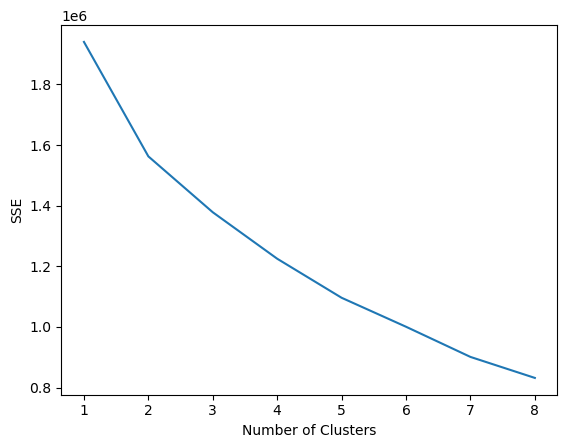

In [23]:
numClusters_1 = [1, 2, 3, 4, 5, 6, 7, 8]
SSE_1 = []  # Sum of Squared Errors (SSE)

for k in numClusters_1:
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(ed_transformed_data)
    SSE_1.append(k_means.inertia_)

# Plot the elbow graph
plt.plot(numClusters_1, SSE_1, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [24]:
# Display SSE values for each cluster
print("Clusters:", numClusters_1)
print("SSE:     ", SSE_1)

Clusters: [1, 2, 3, 4, 5, 6, 7, 8]
SSE:      [1940075.0000002848, 1562479.1150500253, 1378158.1634371057, 1224913.649231343, 1096067.8088981698, 1000485.8888263917, 900973.0711317015, 831690.77787313]


The elbow graph suggests that 2 clusters is the best choice.

##### **Applying K-Means Clustering**

In [25]:
# Fit K-Means model with 2 clusters
model_1 = KMeans(n_clusters=2, random_state=42)
model_1.fit(ed_transformed_data)

# Assign cluster labels to the dataset
edited_semi_final_data['Cluster'] = model_1.labels_

# View cluster distribution
edited_semi_final_data.Cluster.value_counts()

c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\OluwatomisinSoetan\AppData\Local\Temp\ipykernel_29044\2416866707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edited_semi_final_data['Cluster'] = model_1.labels_


,cid,account_type,user_account_type,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,...,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Cluster
1,10022222,Client,Individual,39,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3300110000,Broker-Dealer,Corporate,19,76.0,14.0,38.0,38.0,1.0,19.0,...,1.0,1.0,1.0,1.0,2400000.0,1.0,10.0,10.0,50000000.0,1
4,3300110006,Investor,Individual,14,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3300110131,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,4000110002,Investor,Individual,46,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78508,9900187460,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78509,9900187461,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78510,9900187462,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78511,9900187463,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


##### **Reviewing Cluster Composition**
Identify potential outliers within the clusters.

In [26]:
print("Cluster 0:")
display(edited_semi_final_data[edited_semi_final_data.Cluster == 0].tail(3))

print("Cluster 1:")
display(edited_semi_final_data[edited_semi_final_data.Cluster == 1].head(3))

Cluster
0    71044
1     6559
Name: count, dtype: int64

##### **Ensuring Even Cluster Distribution**
Remove client IDs that stand alone in their clusters until clusters are balanced.

In [27]:
# Verify counts per user_type and client_type in the clusters
print(edited_semi_final_data.client_type.value_counts(), "\n")
print(edited_semi_final_data.user_type.value_counts(), "\n")
print(edited_semi_final_data.Cluster.value_counts())

Cluster 0


,cid,account_type,user_account_type,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,...,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Cluster
78510,9900187462,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78511,9900187463,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78512,9900187464,Investor,Individual,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Cluster 1


,cid,account_type,user_account_type,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,...,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Cluster
3,3300110000,Broker-Dealer,Corporate,19,76.0,14.0,38.0,38.0,1.0,19.0,...,1.0,1.0,1.0,1.0,2.400000e+06,1.0,10.0,10.0,5.000000e+07,1
7,4000110003,Investor,Individual,46,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,24.0,24.0,1.000000e+05,0.0,0.0,0.0,0.000000e+00,1
23,5000110004,Investor,Corporate,38,96.0,0.0,91.0,5.0,15.0,33.0,...,35.0,0.0,15.0,33.0,4.679142e+09,34.0,17.0,22.0,6.394955e+09,1


- Cluster 0: 71,044 clients
- Cluster 1: 6,559 clients

##### **Hypothesis Testing: Business vs. Personal Clients**

The hypothesis is that Cluster 1 contains business clients and high-volume personal traders, while Cluster 0 consists of less active traders.

In [28]:
# Analyze clusters based on user type
cluster_by_user = edited_semi_final_data.groupby(['Cluster', 'user_type']).size().reset_persex(name='Count')
cluster_by_user

cid  account_type  client_tenure_months  \
user_account_type Cluster                                              
Corporate         0          702           702                   702   
                  1          139           139                   139   
Individual        0        70342         70342                 70342   
                  1         6420          6420                  6420   

                           trade_freq  last90days_trade_freq  buy_trade_freq  \
user_account_type Cluster                                                      
Corporate         0               702                    702             702   
                  1               139                    139             139   
Individual        0             70342                  70342           70342   
                  1              6420                   6420            6420   

                           sell_trade_freq  trade_recency_months  \
user_account_type Cluster                                          
Corporate         0                    702                   702   
                  1                    139                   139   
Individual        0                  70342                 70342   
                  1                   6420                  6420   

                           trade_tenure_months  trade_value  ...  \
user_account_type Cluster                                    ...   
Corporate         0                        702          702  ...   
                  1                        139          139  ...   
Individual        0                      70342        70342  ...   
                  1                       6420         6420  ...   

                           deposit_amount  withdrawal_freq  \
user_account_type Cluster                                    
Corporate         0                   702              702   
                  1                   139              139   
Individual        0                 70342            70342   
                  1                  6420             6420   

                           last90days_withdrawal_freq  \
user_account_type Cluster                               
Corporate         0                               702   
                  1                               139   
Individual        0                             70342   
                  1                              6420   

                           withdrawal_recency_months  \
user_account_type Cluster                              
Corporate         0                              702   
                  1                              139   
Individual        0                            70342   
                  1                             6420   

                           withdrawal_tenure_months  withdrawal_amount  \
user_account_type Cluster                                                
Corporate         0                             702                702   
                  1                             139                139   
Individual        0                           70342              70342   
                  1                            6420               6420   

                           loan_freq  loan_recency_months  loan_tenure_months  \
user_account_type Cluster                                                       
Corporate         0              702                  702                 702   
                  1              139                  139                 139   
Individual        0            70342                70342               70342   
                  1             6420                 6420                6420   

                           loan_value_collected  
user_account_type Cluster                        
Corporate         0                         702  
                  1                         139  
Individual        0                       70342  
                  1                        6420  

[4 rows x 2

This confirms that most clients are Personal Traders, but high-activity clients (both business and personal) are likely in Cluster 1.

#### **Connecting Cluster Labels to Original Data**
Before further analysis, we investigate how clusters align with client segmentation.

##### **Observations**
- Cluster 0 primarily consists of personal clients, contradicting the initial assumption.
- The clustering seems to group clients based on transaction patterns rather than net worth, which aligns with the analysis goal.
- To enhance insights, we will separate the dataset into business and personal clients and explore each group persependently.

#### **Analyzing Cluster Composition**
Cluster Distribution by Client Type
To understand the makeup of each cluster, we analyze the count of users per category.

In [35]:
cluster_by_acc = edited_semi_final_data.groupby(['Cluster', 'user_type', 'client_type']).size().reset_persex(name='Count')
cluster_by_acc

,Cluster,user_account_type,account_type,Count
0,0,Corporate,Broker,18
1,0,Corporate,Broker-Dealer,63
2,0,Corporate,Client,1
3,0,Corporate,Dealer,13
4,0,Corporate,Financier,1
5,0,Corporate,Investor,604
6,0,Corporate,Promoter,2
7,0,Individual,Client,2
8,0,Individual,Investor,70261
9,0,Individual,Promoter,76


#### **Average RFM Values per Cluster**
We compute the mean values for key behavioral metrics across clusters.

In [36]:
avg_edited_semi_final_data = edited_semi_final_data.groupby(['Cluster'])[
    ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
     'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
     'trade_tenure_months', 'trade_value', 'available_balance',
     'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
     'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
     'withdrawal_freq', 'last90days_withdrawal_freq',
     'withdrawal_recency_months', 'withdrawal_tenure_months',
     'withdrawal_amount', 'loan_freq', 'loan_recency_months',
     'loan_tenure_months', 'loan_value_collected']
].mean()

# Append cluster counts
f_avg_edited_semi_final_data = avg_edited_semi_final_data.assign(
    Count=edited_semi_final_data['Cluster'].value_counts()
)

f_avg_edited_semi_final_data

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Count
Cluster,,,,,,,,,,,,,,,,,,,,,
0,22.254983,0.056092,0.016342,0.040721,0.015371,0.058738,0.099122,2.158141e+06,2.278220e+04,10873.507967,...,0.008108,0.004152,0.018482,0.022282,2.027626e+05,0.000690,0.000662,0.001182,1.687679e+05,71044
1,22.095899,6.076841,0.417899,3.550389,2.526452,12.716878,15.841439,9.189567e+07,3.829435e+06,472798.063729,...,1.340753,0.112517,9.653453,11.029578,1.922088e+07,0.063882,0.084921,0.123799,1.032889e+07,6559


#### **Quartile Analysis per Cluster**
To better understand the distribution of client activity within clusters, we calculate quartiles for key variables.

In [37]:
edited_semi_final_data_quart = (
    edited_semi_final_data.groupby(['Cluster'])[
        ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
         'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
         'trade_tenure_months', 'trade_value', 'available_balance',
         'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
         'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
         'withdrawal_freq', 'last90days_withdrawal_freq',
         'withdrawal_recency_months', 'withdrawal_tenure_months',
         'withdrawal_amount', 'loan_freq', 'loan_recency_months',
         'loan_tenure_months', 'loan_value_collected']
    ].quantile([0.25, 0.50, 0.75])
    .unstack()
    .rename(columns={0.25: 'Q1', 0.50: 'Q2', 0.75: 'Q3'})
)

edited_semi_final_data_quart


client_tenure_months  trade_freq  last90days_trade_freq  \
Cluster                                                                 
0       0.25                  17.0         0.0                    0.0   
        0.50                  21.0         0.0                    0.0   
        0.75                  23.0         0.0                    0.0   
1       0.25                  17.0         1.0                    0.0   
        0.50                  21.0         2.0                    0.0   
        0.75                  23.0         4.0                    0.0   

              buy_trade_freq  sell_trade_freq  trade_recency_months  \
Cluster                                                               
0       0.25             0.0              0.0                   0.0   
        0.50             0.0              0.0                   0.0   
        0.75             0.0              0.0                   0.0   
1       0.25             1.0              0.0                   2.0   
        0.50             1.0              0.0                  15.0   
        0.75             3.0              2.0                  20.0   

              trade_tenure_months  trade_value  available_balance  \
Cluster                                                             
0       0.25                  0.0         0.00              0.000   
        0.50                  0.0         0.00              0.000   
        0.75                  0.0         0.00              0.000   
1       0.25                 12.0       212.00              0.290   
        0.50                 18.0       803.88             58.930   
        0.75                 21.0      4101.15            266.085   

              cash_advance_balance  ...  deposit_amount  withdrawal_freq  \
Cluster                             ...                                    
0       0.25                   0.0  ...           0.000              0.0   
        0.50                   0.0  ...           0.000              0.0   
        0.75                   0.0  ...           0.000              0.0   
1       0.25                   0.0  ...         394.400              0.0   
        0.50                   0.0  ...         986.000              1.0   
        0.75                   0.0  ...        4014.645              1.0   

              last90days_withdrawal_freq  withdrawal_recency_months  \
Cluster                                                               
0       0.25                         0.0                        0.0   
        0.50                         0.0                        0.0   
        0.75                         0.0                        0.0   
1       0.25                         0.0                        0.0   
        0.50                         0.0                        9.0   
        0.75                         0.0                       18.0   

              withdrawal_tenure_months  withdrawal_amount  loan_freq  \
Cluster                                                                
0       0.25                       0.0               0.00        0.0   
        0.50                       0.0               0.00        0.0   
        0.75                       0.0               0.00        0.0   
1       0.25                       0.0               0.00        0.0   
        0.50                      13.0             382.59        0.0   
        0.75                      20.0            2500.00        0.0   

              loan_recency_months  loan_tenure_months  loan_value_collected  
Cluster                                                                      
0       0.25                  0.0                 0.0                   0.0  
        0.50                  0.0                 0.0                   0.0  
        0.75                  0.0                 0.0                   0.0  
1       0.25                  0.0                 0.0                   0.0  
        0.50                  0.0                 0.0                   0.0  
      

### **Segmenting the Dataset**
**Key Fpersings**
- Cluster 0 contains the most active clients, making it a strong candidate for deeper analysis.
- To gain further insights, we will analyze user types separately (Personal & business clients) to assess similarities.
- Data transformation will include logging numerical values to correct skewness before further modeling.

### Splitting the Dataset by User Type
Overall User Distribution

In [38]:
print("User Type Distribution: \n")
print(edited_semi_final_data['user_type'].value_counts())

##### **Removing Clustering Labels for persependent Analysis**
We drop the Cluster column to focus purely on user segmentation.

In [39]:
data_to_divide = edited_semi_final_data.drop(columns=['Cluster'])
data_to_divide.head(2)

All 

user_account_type
Individual    76762
Corporate       841
Name: count, dtype: int64


##### **Personal Clients**

In [40]:
print("Personal Clients\n")

personal = data_to_divide[data_to_divide['user_type'] == "Personal"]

print("Total Personal Clients:", personal['client_id'].count(), "\n")
print(personal['client_type'].value_counts())

,cid,account_type,user_account_type,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,...,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
1,10022222,Client,Individual,39,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3300110000,Broker-Dealer,Corporate,19,76.0,14.0,38.0,38.0,1.0,19.0,...,1328124.0,1.0,1.0,1.0,1.0,2400000.0,1.0,10.0,10.0,50000000.0


##### **Business Clients**

In [41]:
print("Business Clients\n")

business = data_to_divide[data_to_divide['user_type'] == "Business"]

print("Total Business Clients:", business['client_id'].count(), "\n")
print(business['client_type'].value_counts())


Individual - 

Total   76762 

account_type
Investor    76582
Promoter      170
Client          7
trader          3
Name: count, dtype: int64


##### **Next Steps**
- Investigate key differences in behavior between Personal and business clients.
- Apply feature transformations (e.g., log scaling) to ensure numerical stability before further clustering or predictive modeling.
- Assess whether segmentation results align with business expectations and refine clusters accordingly.

# Clustering - Business Clients

**Drop Categorical Columnns, retaining only relevant numerical columns for clustering.**

In [44]:
# Selecting only numerical columns (starting from persex 3)
busi_data = business.iloc[:, 3:].copy()

# Display first few rows
busi_data.head()

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
3,19,76.0,14.0,38.0,38.0,1.0,19.0,1.531545e+08,6.943882e+04,0.0,...,1.328124e+06,1.0,1.0,1.0,1.0,2.400000e+06,1.0,10.0,10.0,5.000000e+07
20,22,13.0,0.0,13.0,0.0,3.0,28.0,2.540009e+08,7.200000e-01,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
23,38,96.0,0.0,91.0,5.0,15.0,33.0,3.631322e+08,0.000000e+00,0.0,...,1.259335e+09,35.0,0.0,15.0,33.0,4.679142e+09,34.0,17.0,22.0,6.394955e+09
29,38,248.0,21.0,247.0,1.0,0.0,32.0,2.334200e+09,-4.169605e+08,0.0,...,1.120000e+09,0.0,0.0,0.0,0.0,0.000000e+00,6.0,20.0,22.0,5.387111e+08
30,38,123.0,13.0,123.0,0.0,0.0,28.0,5.948770e+08,-4.913840e+07,0.0,...,2.331668e+08,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00


## Data Transformation


### **Log Transformation**
Log transformation helps normalize skewed distributions, making data more suitable for clustering.

In [45]:
# Perform log transformation to reduce skewness
busi_data_log = np.log(busi_data)

# Replace infinity values (caused by log transformation) with zeros
busi_data_log.replace([np.inf, -np.inf], 0, inplace=True)

# Fill any NaN values in 'available_balance' with zero
busi_data_log['available_balance'] = busi_data_log['available_balance'].fillna(0)

# Check for any remaining NaN values
busi_data_log[busi_data_log.available_balance.isna()]

c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected


### Standardization
Standardize features to have zero mean and unit variance.

In [47]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the log-transformed data
scaler.fit(busi_data_log)

# Transform the data using the fitted scaler
transformed_busi_data = scaler.transform(busi_data_log)

# Display mean and standard deviation of transformed data
print('Mean:', transformed_busi_data.mean(axis=0).round(2))
print('Standard Deviation:', transformed_busi_data.std(axis=0).round(2))

StandardScaler()

In [48]:
# Convert standardized data to a DataFrame for better readability
pd_trans_busi_data = pd.DataFrame(transformed_busi_data)

array([[ 0.56925624,  2.97187652,  4.2746202 , ...,  5.19781249,
         3.95924323,  3.86347003],
       [ 0.71413362,  1.56322046, -0.27162696, ..., -0.19130181,
        -0.21446087, -0.2307936 ],
       [ 1.25424237,  3.15824301, -0.27162696, ...,  6.43972806,
         5.38841418,  4.98388886],
       ...,
       [-2.34051519, -0.48297063, -0.27162696, ..., -0.19130181,
        -0.21446087, -0.2307936 ],
       [-2.34051519, -0.48297063, -0.27162696, ..., -0.19130181,
        -0.21446087, -0.2307936 ],
       [-2.34051519, -0.48297063, -0.27162696, ..., -0.19130181,
        -0.21446087, -0.2307936 ]])

In [49]:
# Preview the transformed dataset
pd_trans_busi_data.head()

mean:  [ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0.
 -0. -0. -0.  0. -0.  0.]
std:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Cluster Analysis
### **Determine Optimal Number of Clusters**

Plot an elbow graph to identify the optimal number of clusters.

c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'SSE')

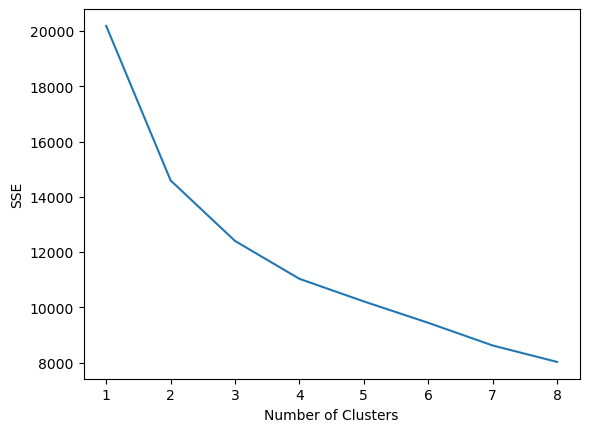

In [51]:
# Define possible cluster counts and initialize SSE list
busi_numClusters = [1, 2, 3, 4, 5, 6, 7, 8]
busi_SSE = []  # Sum of Squared Errors (SSE)

# Compute SSE for each cluster count
for k in busi_numClusters:
    k_means = KMeans(n_clusters=k)
    k_means.fit(transformed_busi_data)
    busi_SSE.append(k_means.inertia_)

# Plot the elbow graph
plt.plot(busi_numClusters, busi_SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [52]:
# Display SSE values per cluster
print("Clusters:", busi_numClusters)
print("SSE:", busi_SSE)

Clusters: [1, 2, 3, 4, 5, 6, 7, 8]
SSE:      [1862495.9999998515, 1431586.6889944044, 1141342.250623735, 1002784.5568967556, 894654.0221788252, 800664.1476923384, 727459.5001894056, 673742.3682514512]


### **Cluster Option 1** (2 Clusters)
#### **Apply K-Means clustering with 2 clusters.**

In [53]:
# Train K-Means model with 2 clusters
busi_model_2 = KMeans(n_clusters=2, random_state=1)
busi_model_2.fit(transformed_busi_data)

# Extract cluster labels
busi_labels_2 = busi_model_2.labels_
len(busi_labels_2)

# Assign cluster labels to the original dataset
business_w_label_2 = business.copy()
business_w_label_2 = business_w_label_2.assign(Cluster=busi_labels_2)

# Display dataset information
business_w_label_2.info()

# Count of businesses in each cluster
print(business_w_label_2.Cluster.value_counts(), "\n")

# Count of businesses per client type
print(business_w_label_2.client_type.value_counts())

# Compare with previous clustering results for business clients
cluster_by_user[cluster_by_user['user_type'] == 'Business']


c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


841

#### **Analyze Cluster Characteristics - 2 Clusters**
Calculate the average RFM (Recency, Frequency, Monetary) values for each cluster.

In [54]:
# Compute mean values for key features in each cluster
avg_busi_w_label_2 = business_w_label_2.groupby(['Cluster'])[
    ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
     'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
     'trade_tenure_months', 'trade_value', 'available_balance',
     'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
     'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
     'withdrawal_freq', 'last90days_withdrawal_freq',
     'withdrawal_recency_months', 'withdrawal_tenure_months',
     'withdrawal_amount', 'loan_freq', 'loan_recency_months',
     'loan_tenure_months', 'loan_value_collected']
].mean()

# Append cluster counts to the summary table
f_avg_busi_w_label_2 = avg_busi_w_label_2.assign(Count=business_w_label_2.Cluster.value_counts())

# Format numeric display
pd.options.display.float_format = '{:,}'.format
f_avg_busi_w_label_2


<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 3 to 78492
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cid                         841 non-null    object 
 1   account_type                841 non-null    object 
 2   user_account_type           841 non-null    object 
 3   client_tenure_months        841 non-null    int64  
 4   trade_freq                  841 non-null    float64
 5   last90days_trade_freq       841 non-null    float64
 6   buy_trade_freq              841 non-null    float64
 7   sell_trade_freq             841 non-null    float64
 8   trade_recency_months        841 non-null    float64
 9   trade_tenure_months         841 non-null    float64
 10  trade_value                 841 non-null    float64
 11  available_balance           841 non-null    float64
 12  cash_advance_balance        841 non-null    float64
 13  deposit_freq                841 non-nu

##### **Visualize Cluster Characteristics**
Use a heatmap to display average feature values per cluster.

In [55]:
plt.figure(figsize=(50, 5))
plt.title('Average Value of Features')

sns.heatmap(data=f_avg_busi_w_label_2, annot=True, cmap='RdYlGn')
plt.show()

Cluster
0    721
1    120
Name: count, dtype: int64


account_type
Investor         714
Broker-Dealer     86
Broker            19
Dealer            15
Promoter           4
Client             2
Financier          1
Name: count, dtype: int64


#### **Cluster Quartile Analysis**
Compute RFM quartiles for each cluster.

In [56]:
# Calculate quartile values (Q1, Q2, Q3) for key features in each cluster
busi_2_seg_quart = business_w_label_2.groupby(['Cluster'])[
    ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
     'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
     'trade_tenure_months', 'trade_value', 'available_balance',
     'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
     'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
     'withdrawal_freq', 'last90days_withdrawal_freq',
     'withdrawal_recency_months', 'withdrawal_tenure_months',
     'withdrawal_amount', 'loan_freq', 'loan_recency_months',
     'loan_tenure_months', 'loan_value_collected']
].quantile([0.25, 0.50, 0.75])

# Reset persex for visualization
busi_2_seg_quart_reset = busi_2_seg_quart.reset_persex()


,Cluster,user_account_type,Count
0,0,Corporate,702
2,1,Corporate,139


##### **Visualize Quartile Analysis**
Plot a heatmap of quartile values for each feature.

In [167]:
plt.figure(figsize=(50, 5))
plt.title('Quartile Value of Features')

ax = sns.heatmap(data=busi_2_seg_quart_reset.pivot(persex='Cluster'), annot=True, cmap='RdYlGn')
plt.show()

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,deposit_freq,last90days_deposit_freq,deposit_recency_months,deposit_tenure_months,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Count
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,14.246879334257976,3.60748959778086,0.4174757281553398,3.274618585298197,0.332871012482663,1.5617198335644937,2.5714285714285716,"103,297,503.82030511","-5,255,151.885825243","2,361,473.6477115117",0.0651872399445215,0.015256588072122053,0.5395284327323162,0.5450762829403606,"10,724,994.46435506",0.06102635228848821,0.024965325936199722,0.10957004160887657,0.1317614424410541,"2,807,543.758488211",0.006934812760055479,0.012482662968099861,0.012482662968099861,"1,635,936.1997226074",721
1,22.708333333333332,60.81666666666667,4.433333333333334,33.05833333333333,27.758333333333333,6.633333333333334,17.816666666666666,"3,195,015,250.5205","79,924,964.12174998","8,421,187.5",4.575,0.1,11.341666666666667,14.308333333333334,"226,402,841.40458336",6.566666666666666,0.875,7.975,13.316666666666666,"994,839,598.3160001",2.825,2.783333333333333,4.791666666666667,"541,161,255.1011666",120


#### **Summarize Monetary Values per Cluster**
Sum key monetary features for each cluster.

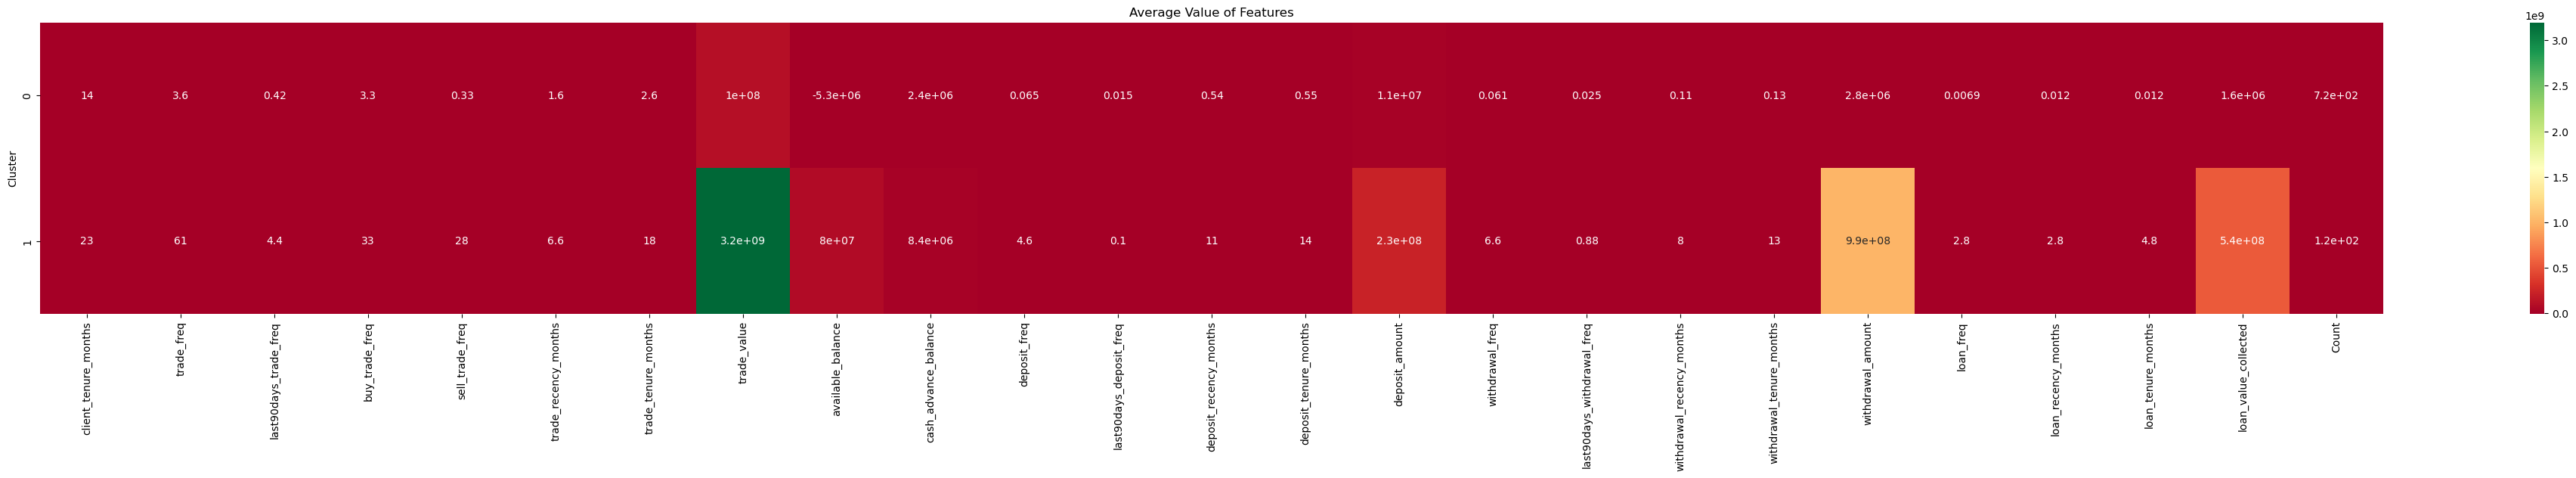

In [180]:
sum_busi_w_label_2 = business_w_label_2.groupby(['Cluster'])[
    ['trade_value', 'available_balance', 'cash_advance_balance', 
     'deposit_amount', 'withdrawal_amount', 'loan_freq', 
     'loan_recency_months', 'loan_value_collected']
].sum()

sum_busi_w_label_2

#### **Observations & Next Steps**
- Evidently, Cluster 1 encompasses the more active clients. While Cluster 0 encompasses the not so active clients.
- However, that doesn't necessitate that Cluster 1 is the most profitable group (moneywise), even though they have brought in the most trade value

- Let's consider the 3 clusters option, considering that the elbow chart suggested between 2 or 3 clusters. Possibly there are clients that fall between the active and not so active clients

### **Cluster Option 2** (3 Clusters)
#### **Apply K-Means clustering with 3 clusters.**

In [62]:
# Fit KMeans model with 3 clusters
busi_model_3 = KMeans(n_clusters=3, random_state=1)
busi_model_3.fit(transformed_busi_data)
busi_labels_3 = busi_model_3.labels_

# Add cluster labels to the original dataset
business_w_label_3 = business.copy()
business_w_label_3['Cluster'] = busi_labels_3

# Display dataset info
business_w_label_3.info()

# Count of records per cluster
print(business_w_label_3.Cluster.value_counts(), "\n")

# Count of records per client type
print(business_w_label_3.client_type.value_counts())

# Compare with previous 2-cluster segmentation
cluster_by_user[cluster_by_user['user_type'] == 'Business']


c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


841

#### **Analyze Cluster Characteristics - 3 Clusters**
Calculate the average RFM (Recency, Frequency, Monetary) values for each cluster.

In [193]:
# Compute average values for key features per cluster
avg_busi_w_label_3 = business_w_label_3.groupby('Cluster')[
    ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
     'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
     'trade_tenure_months', 'trade_value', 'available_balance',
     'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
     'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
     'withdrawal_freq', 'last90days_withdrawal_freq',
     'withdrawal_recency_months', 'withdrawal_tenure_months',
     'withdrawal_amount', 'loan_freq', 'loan_recency_months',
     'loan_tenure_months', 'loan_value_collected']
].mean()

# Add cluster size
f_avg_busi_w_label_3 = avg_busi_w_label_3.assign(Count=business_w_label_3.Cluster.value_counts())

# Display heatmap
plt.figure(figsize=(50, 5))
plt.title('Average Value of Features')
sns.heatmap(data=f_avg_busi_w_label_3, annot=True, cmap='RdYlGn')
plt.show()


,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,deposit_freq,last90days_deposit_freq,deposit_recency_months,deposit_tenure_months,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Count
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,14.083700440528634,1.3715124816446402,0.28487518355359764,1.2687224669603525,0.1027900146842878,1.2437591776798824,1.8634361233480177,"21,915,430.996593244","-3,410,531.557444934","891,262.8487518355",0.039647577092511016,0.00881057268722467,0.3274596182085169,0.33186490455212925,"11,202,413.140088106",0.039647577092511016,0.023494860499265784,0.03671071953010279,0.05286343612334802,"2,129,996.255315712",0.007342143906020558,0.013215859030837005,0.013215859030837005,"1,732,026.4317180617",681
1,19.64864864864865,41.45945945945946,1.5405405405405406,24.243243243243242,17.216216216216218,4.45945945945946,11.216216216216216,"799,131,792.0772974","-2,027,380.0872972978","9,086,486.486486487",7.864864864864865,0.0,7.4324324324324325,11.135135135135135,"218,932,793.6008108",7.027027027027027,0.35135135135135137,6.54054054054054,11.81081081081081,"1,378,598,007.0859458",9.135135135135135,9.0,15.513513513513514,"1,752,527,043.5713513",37
2,21.78048780487805,60.41463414634146,4.7317073170731705,37.13008130081301,23.284552845528456,7.3983739837398375,18.764227642276424,"3,360,870,288.628943","66,663,546.65674797","14,390,365.853658536",2.2601626016260163,0.13821138211382114,10.178861788617887,11.967479674796747,"155,867,522.48552847",4.430894308943089,0.7642276422764228,6.252032520325203,9.91869918699187,"560,539,326.3068293",0.008130081300813009,0.008130081300813009,0.008130081300813009,"779,268.2926829269",123


#### **Cluster Quartile Analysis**
Compute RFM quartiles for each cluster.

In [ ]:
# Compute quartiles for key metrics per cluster
busi_3_seg_quart = business_w_label_3.groupby('Cluster')[
    ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
     'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
     'trade_tenure_months', 'trade_value', 'available_balance',
     'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
     'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
     'withdrawal_freq', 'last90days_withdrawal_freq',
     'withdrawal_recency_months', 'withdrawal_tenure_months',
     'withdrawal_amount', 'loan_freq', 'loan_recency_months',
     'loan_tenure_months', 'loan_value_collected']
].quantile([0.25, 0.50, 0.75]).unstack().rename(
    columns={0.25: 'Q1', 0.50: 'Q2', 0.75: 'Q3'}
)

# Display quartile heatmap
plt.figure(figsize=(50, 5))
plt.title('Quartile Value of Features')
sns.heatmap(data=busi_3_seg_quart, annot=True, cmap='RdYlGn')
plt.show()


Cluster
0    721
1    120
Name: count, dtype: int64


account_type
Investor         714
Broker-Dealer     86
Broker            19
Dealer            15
Promoter           4
Client             2
Financier          1
Name: count, dtype: int64


#### **Monetary Value Analysis by Cluster**

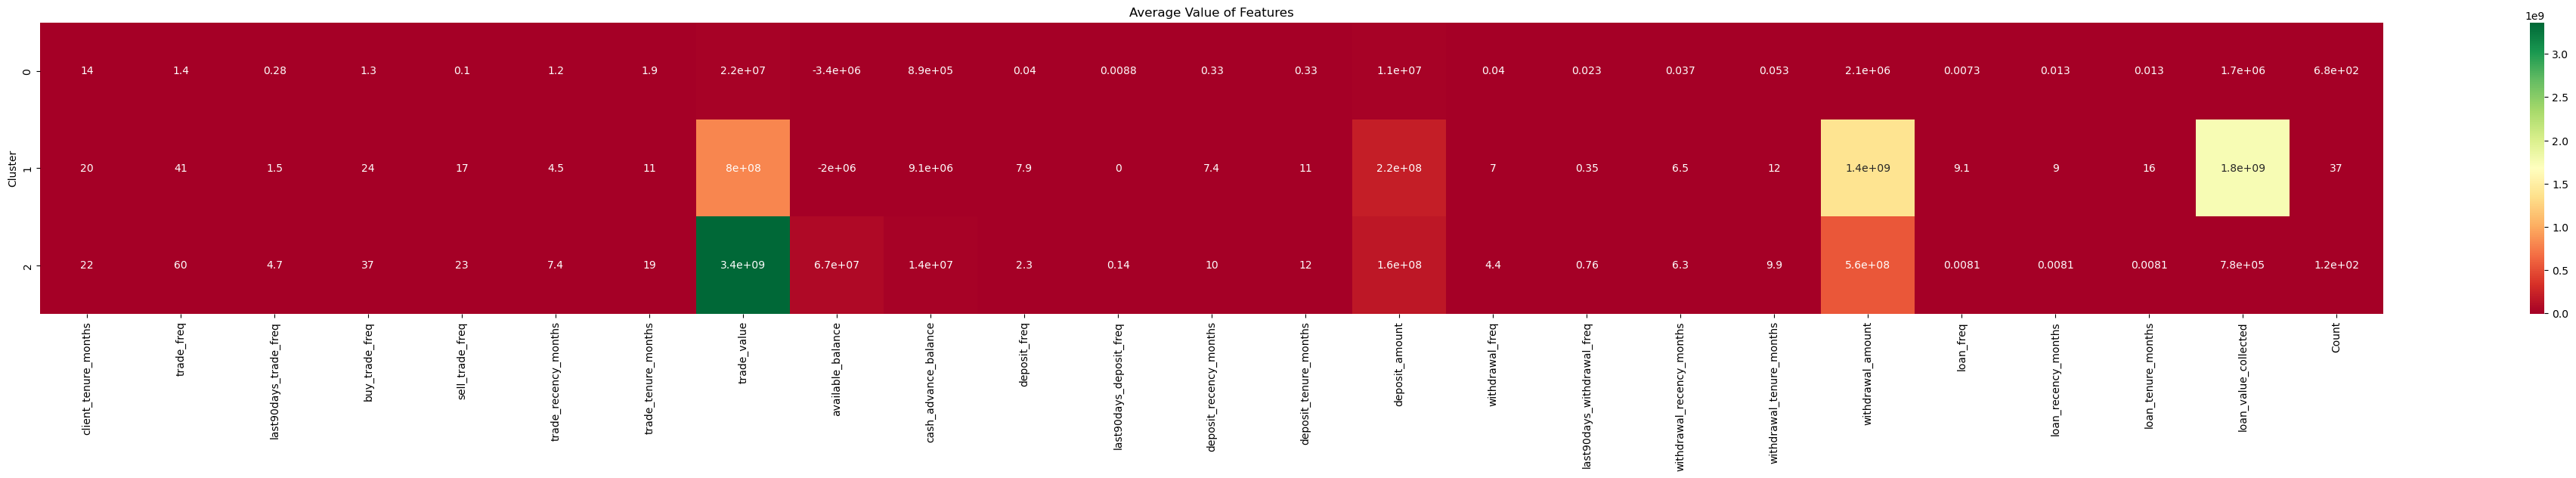

In [194]:
# Compute total monetary values per cluster
sum_busi_w_label_3 = business_w_label_3.groupby('Cluster')[
    ['trade_value', 'available_balance', 'cash_advance_balance',
     'deposit_amount', 'withdrawal_amount', 'loan_freq',
     'loan_recency_months', 'loan_value_collected']
].sum()

# Display high-frequency traders in Cluster 0
business_w_label_3[business_w_label_3.Cluster == 0].sort_values(['trade_freq']).tail(10)


#### **Cluster Insights**
- Cluster 1: Users exploring the platform with minimal activity.
- Cluster 2: Users with some engagement, trying out the exchange.
- Cluster 3: Highly engaged users aiming to maximize platform benefits.

## Result Analysis

### **Relative Importance of Segment Attributes**
To analyze the average RFM (Recency, Frequency, Monetary) values of each cluster, a cluster label column is added to the dataset.

In [73]:
adj_business_w_label_2 = busi_data.assign(Cluster=busi_labels_2)
adj_business_w_label_3 = busi_data.assign(Cluster=busi_labels_3)


,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Cluster
3,19,76.0,14.0,38.0,38.0,1.0,19.0,1.531545e+08,6.943882e+04,0.0,...,1.0,1.0,1.0,1.0,2.400000e+06,1.0,10.0,10.0,5.000000e+07,1
20,22,13.0,0.0,13.0,0.0,3.0,28.0,2.540009e+08,7.200000e-01,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0
23,38,96.0,0.0,91.0,5.0,15.0,33.0,3.631322e+08,0.000000e+00,0.0,...,35.0,0.0,15.0,33.0,4.679142e+09,34.0,17.0,22.0,6.394955e+09,1
29,38,248.0,21.0,247.0,1.0,0.0,32.0,2.334200e+09,-4.169605e+08,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,6.0,20.0,22.0,5.387111e+08,1
30,38,123.0,13.0,123.0,0.0,0.0,28.0,5.948770e+08,-4.913840e+07,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2


#### **Cluster 2: Attribute Importance**
- Compute the cluster average and population average.
- Calculate the relative importance of each attribute for Cluster 2.

In [154]:
busi_cluster_avg_2 = adj_business_w_label_2.groupby('Cluster').mean()
busi_population_avg_2 = busi_data.mean()
busi_relative_imp_2 = busi_cluster_avg_2 / busi_population_avg_2 - 1
busi_relative_imp_2.round(2)


,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,deposit_freq,last90days_deposit_freq,deposit_recency_months,deposit_tenure_months,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
Cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.08,-0.69,-0.58,-0.56,-0.92,-0.32,-0.46,-0.81,-1.76,-0.27,-0.91,-0.44,-0.74,-0.78,-0.74,-0.94,-0.83,-0.91,-0.93,-0.98,-0.98,-0.97,-0.98,-0.98
1,0.47,4.17,3.48,3.39,5.54,1.90,2.75,4.87,10.59,1.61,5.46,2.66,4.45,4.70,4.46,5.64,4.98,5.47,5.62,5.89,5.91,5.82,5.90,5.88


Attributes with values further from zero indicate greater importance in defining the cluster.

##### **Visualization:**

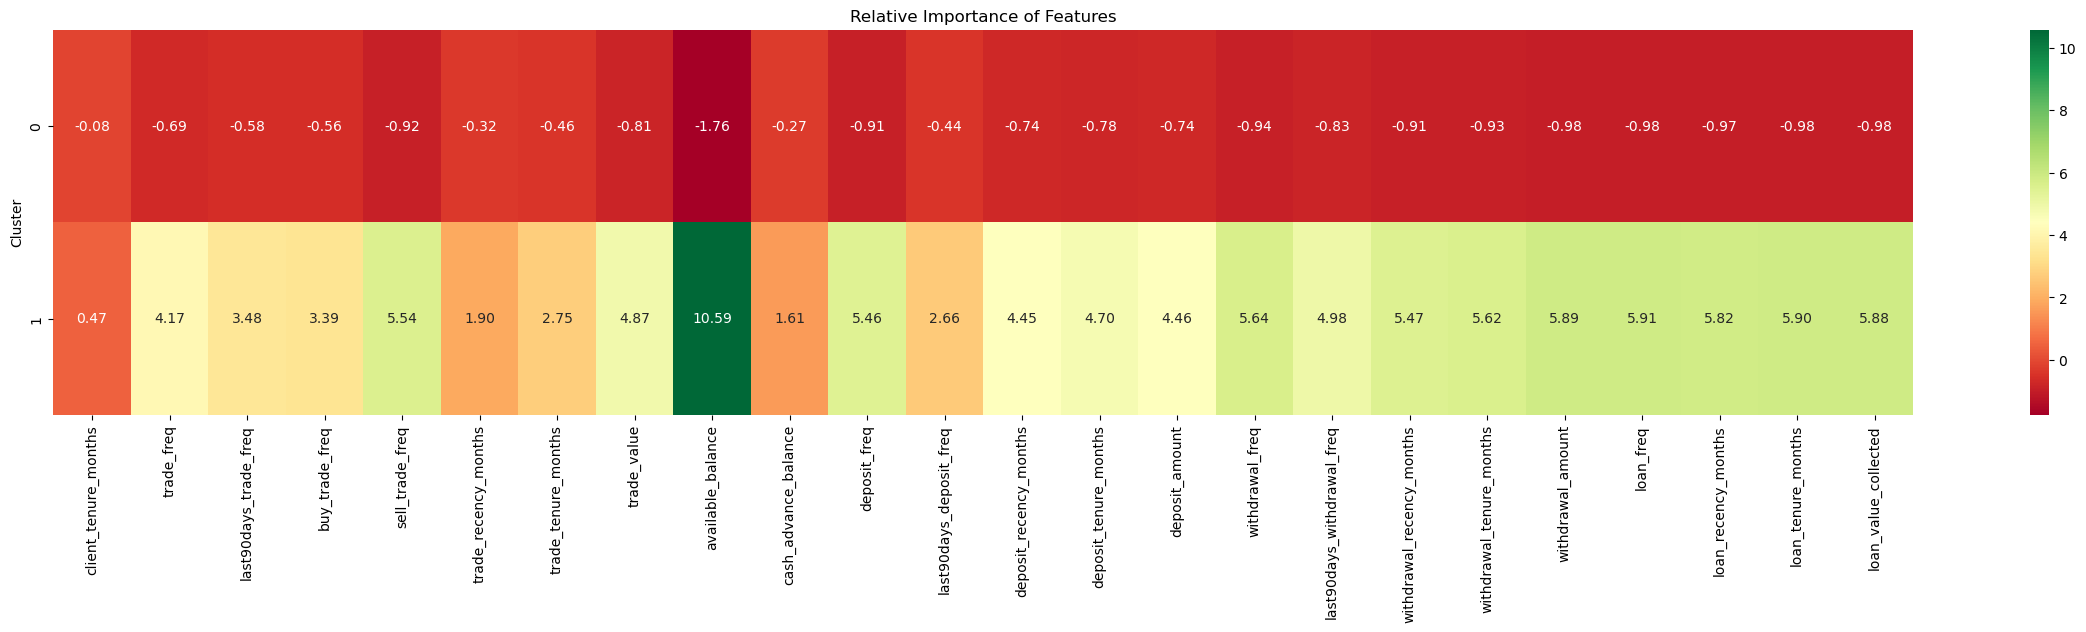

In [158]:
plt.figure(figsize=(30, 5))
plt.title('Relative Importance of Features')
sns.heatmap(data=busi_relative_imp_2, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

#### **Cluster 3: Attribute Importance**
Perform the same calculations for Cluster 3.

In [192]:
busi_cluster_avg_3 = adj_business_w_label_3.groupby('Cluster').mean()
busi_population_avg_3 = busi_data.mean()
busi_relative_imp_3 = busi_cluster_avg_3 / busi_population_avg_3 - 1
busi_relative_imp_3.round(2)

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,deposit_freq,last90days_deposit_freq,deposit_recency_months,deposit_tenure_months,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
Cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.09,-0.88,-0.71,-0.83,-0.98,-0.46,-0.61,-0.96,-1.49,-0.72,-0.94,-0.68,-0.84,-0.87,-0.73,-0.96,-0.84,-0.97,-0.97,-0.99,-0.98,-0.97,-0.98,-0.98
1,0.27,2.52,0.56,2.22,3.05,0.95,1.36,0.47,-1.29,1.82,10.1,-1.0,2.57,3.44,4.28,6.1,1.4,4.31,4.87,8.55,21.33,21.07,21.34,21.29
2,0.41,4.13,3.78,3.93,4.48,2.24,2.95,5.17,8.66,3.46,2.19,4.05,3.89,3.77,2.76,3.48,4.23,4.08,3.93,2.88,-0.98,-0.98,-0.99,-0.99


##### **Visualization:**

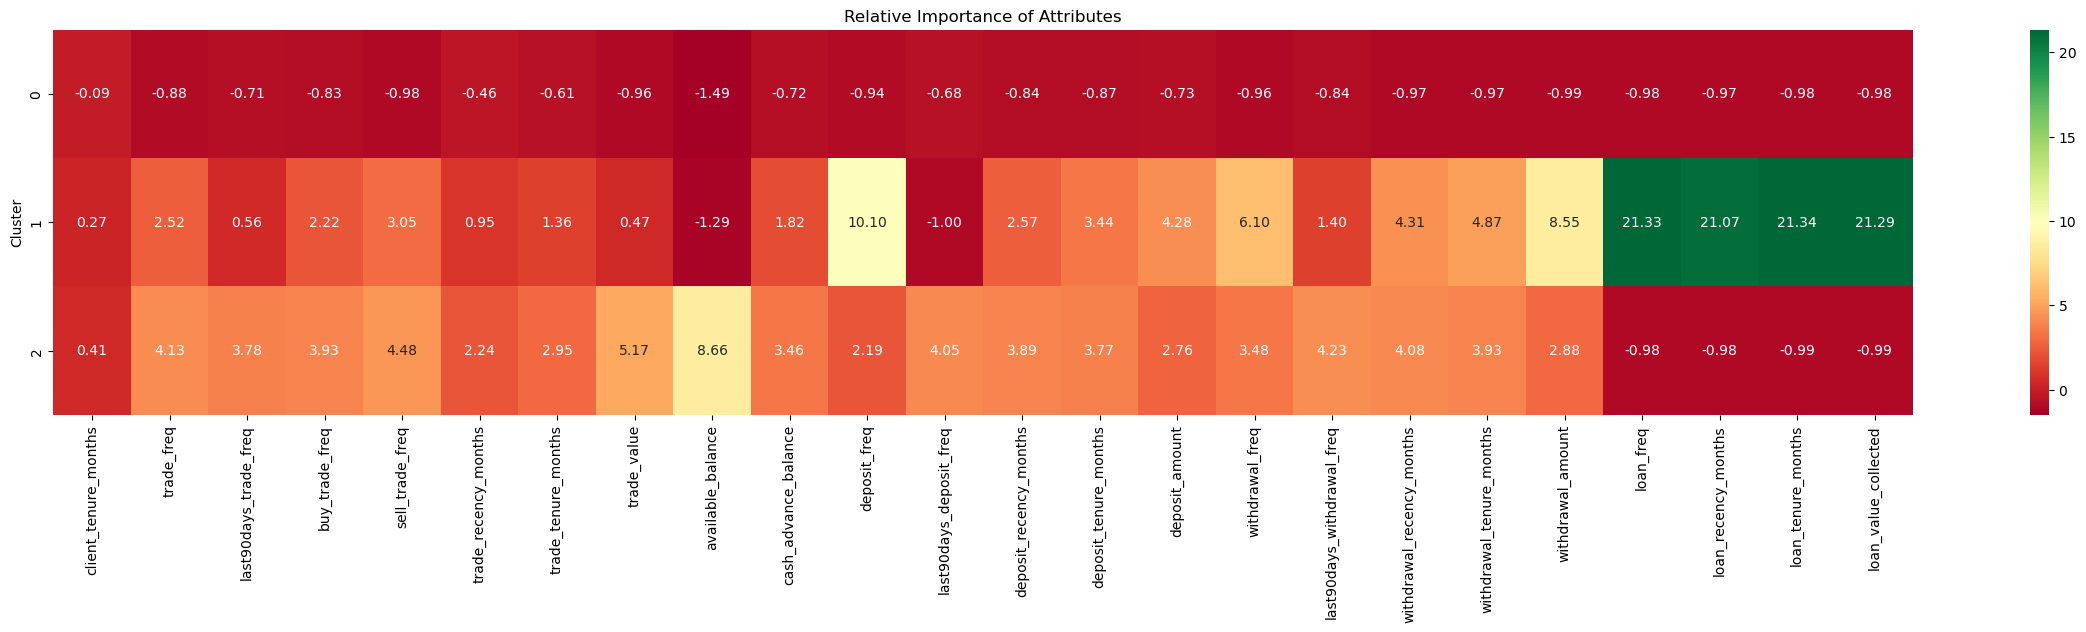

In [77]:
plt.figure(figsize = (30,5))
plt.title('Relative Importance of Attributes')
sns.heatmap(data= busi_relative_imp_3, annot=True, fmt='.2f', cmap= 'RdYlGn')
plt.show()

### **Snake Plot Analysis**
A snake plot is generated to visualize standardized variable trends across clusters.

##### **- Prepare Data**

In [78]:
adj_business = business.iloc[:, [0] + list(range(3, 27))]
adj_busi_snake = adj_business.set_index('client_id')


Index(['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
       'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
       'trade_tenure_months', 'trade_value', 'available_balance',
       'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
       'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
       'withdrawal_freq', 'last90days_withdrawal_freq',
       'withdrawal_recency_months', 'withdrawal_tenure_months',
       'withdrawal_amount', 'loan_freq', 'loan_recency_months',
       'loan_tenure_months', 'loan_value_collected'],
      dtype='object')
24


##### **- Transform Data for Visualization**

In [79]:
pd_trans_busi_data = pd.DataFrame(transformed_busi_data,
                                  persex = adj_busi_snake.persex,
                                  columns = adj_busi_snake.columns)

pd_tbd_labeled = pd_trans_busi_data.assign(Cluster = busi_labels_3)
pd_tbd_labeled.info()


<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 3300110000 to 9900187444
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_tenure_months        841 non-null    float64
 1   trade_freq                  841 non-null    float64
 2   last90days_trade_freq       841 non-null    float64
 3   buy_trade_freq              841 non-null    float64
 4   sell_trade_freq             841 non-null    float64
 5   trade_recency_months        841 non-null    float64
 6   trade_tenure_months         841 non-null    float64
 7   trade_value                 841 non-null    float64
 8   available_balance           841 non-null    float64
 9   cash_advance_balance        841 non-null    float64
 10  deposit_freq                841 non-null    float64
 11  last90days_deposit_freq     841 non-null    float64
 12  deposit_recency_months      841 non-null    float64
 13  deposit_tenure_months   

##### **- Melt Data for Plotting**

In [80]:
pd_tbd_melted = pd.melt(pd_tbd_labeled.reset_persex(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars= ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
                                        'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
                                        'trade_tenure_months', 'trade_value', 'available_balance',
                                        'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
                                        'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
                                        'withdrawal_freq', 'last90days_withdrawal_freq',
                                        'withdrawal_recency_months', 'withdrawal_tenure_months',
                                        'withdrawal_amount', 'loan_freq', 'loan_recency_months',
                                        'loan_tenure_months', 'loan_value_collected'],
                        var_name='Attribute',
                        value_name= 'Value'
                        )

pd_tbd_melted.head()

,cid,Cluster,Attribute,Value
0,3300110000,1,client_tenure_months,0.569256
1,5000000024,0,client_tenure_months,0.714134
2,5000110004,1,client_tenure_months,1.254242
3,5000110010,1,client_tenure_months,1.254242
4,5000110012,2,client_tenure_months,1.254242


##### **- Plot Overall Snake plot**

<function matplotlib.pyplot.show(close=None, block=None)>

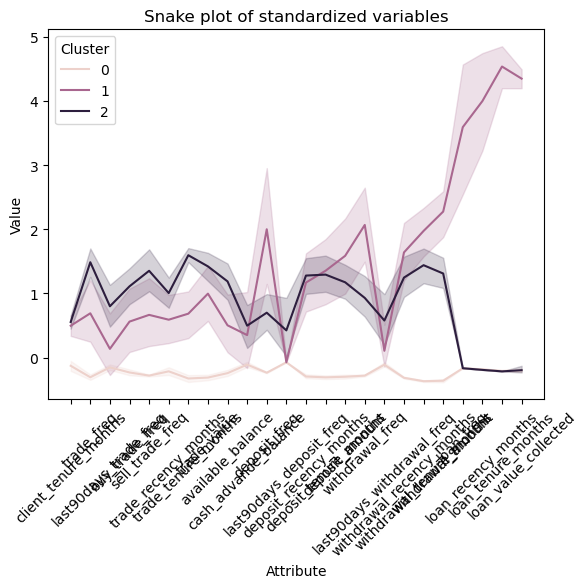

In [81]:
plt.title("Snake plot of standardized variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=pd_tbd_melted)
plt.xticks(rotation=45)
plt.show

##### **- Segmented Snake Plots by Transaction Type**
To reduce clutter, variables are grouped by transaction type:

1. Trade


In [82]:
trade_pd_tbd_melted = pd.melt(pd_tbd_labeled.reset_index(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars=['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
                                    'trade_recency_months', 'trade_tenure_months', 'trade_value'],
                        var_name='Attribute',
                        value_name='Value')

plt.title("Trade: Snake Plot of Standardized Variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=trade_pd_tbd_melted)
plt.xticks(rotation=45)
plt.show()


,cid,Cluster,Attribute,Value
0,3300110000,1,client_tenure_months,0.569256
1,5000000024,0,client_tenure_months,0.714134
2,5000110004,1,client_tenure_months,1.254242
3,5000110010,1,client_tenure_months,1.254242
4,5000110012,2,client_tenure_months,1.254242


2. Loan

<function matplotlib.pyplot.show(close=None, block=None)>

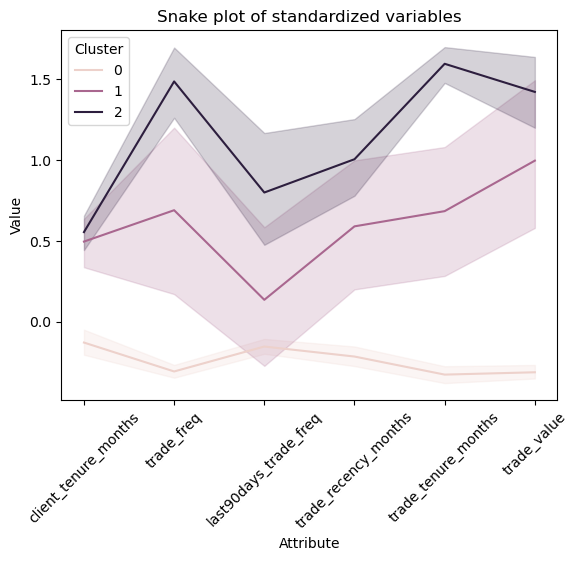

In [83]:
loan_pd_tbd_melted = pd.melt(pd_tbd_labeled.reset_index(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars=['client_tenure_months', 'loan_freq', 'loan_recency_months',
                                    'loan_tenure_months', 'loan_value_collected'],
                        var_name='Attribute',
                        value_name='Value')

plt.title("Loan: Snake Plot of Standardized Variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=loan_pd_tbd_melted)
plt.xticks(rotation=45)
plt.show()


3. Deposit

In [84]:
dep_pd_tbd_melted = pd.melt(pd_tbd_labeled.reset_index(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars=['client_tenure_months', 'available_balance',
                                    'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
                                    'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount'],
                        var_name='Attribute',
                        value_name='Value')

plt.title("Deposit: Snake Plot of Standardized Variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=dep_pd_tbd_melted)
plt.xticks(rotation=45)
plt.show()



,cid,Cluster,Attribute,Value
0,3300110000,1,client_tenure_months,0.569256
1,5000000024,0,client_tenure_months,0.714134
2,5000110004,1,client_tenure_months,1.254242
3,5000110010,1,client_tenure_months,1.254242
4,5000110012,2,client_tenure_months,1.254242


4. Withdrawal

<function matplotlib.pyplot.show(close=None, block=None)>

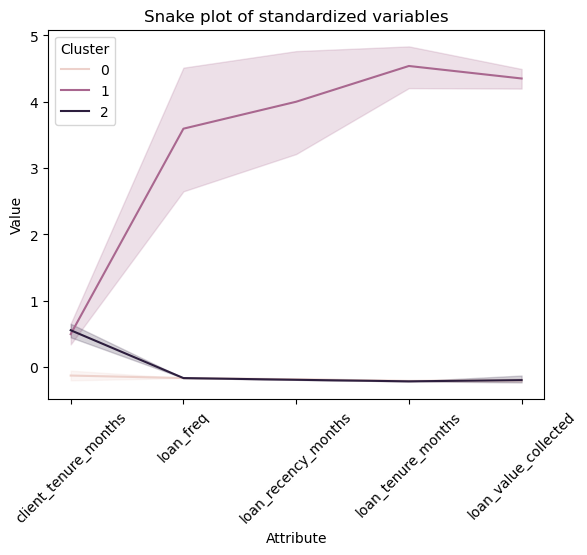

In [85]:
wit_pd_tbd_melted = pd.melt(pd_tbd_labeled.reset_index(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars=['client_tenure_months', 'withdrawal_freq', 'last90days_withdrawal_freq',
                                    'withdrawal_recency_months', 'withdrawal_tenure_months', 'withdrawal_amount'],
                        var_name='Attribute',
                        value_name='Value')

plt.title("Withdrawal: Snake Plot of Standardized Variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=wit_pd_tbd_melted)
plt.xticks(rotation=45)
plt.show()


In [86]:
# Deposit

dep_pd_tbd_melted = pd.melt(pd_tbd_labeled.reset_persex(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars= ['client_tenure_months', 'available_balance',
                                        'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
                                        'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
                                        ],
                        var_name='Attribute',
                        value_name= 'Value'
                        )

dep_pd_tbd_melted.head()

,cid,Cluster,Attribute,Value
0,3300110000,1,client_tenure_months,0.569256
1,5000000024,0,client_tenure_months,0.714134
2,5000110004,1,client_tenure_months,1.254242
3,5000110010,1,client_tenure_months,1.254242
4,5000110012,2,client_tenure_months,1.254242


<function matplotlib.pyplot.show(close=None, block=None)>

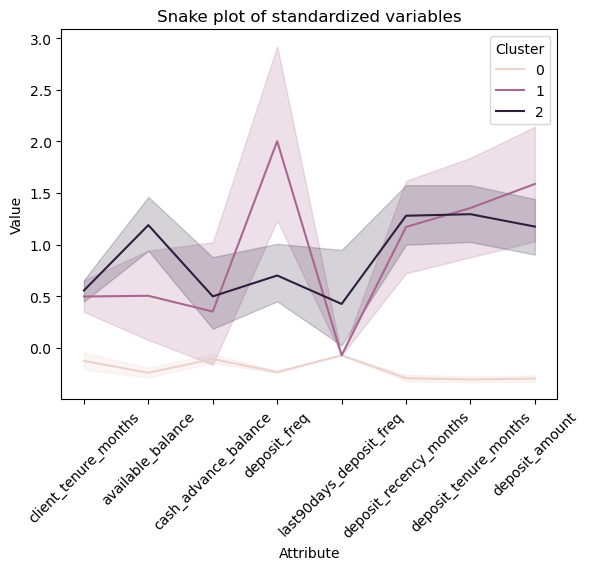

In [87]:
# Create the snake plot
plt.title("Snake plot of standardized variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=dep_pd_tbd_melted)
plt.xticks(rotation=45)
plt.show

In [88]:
# Withdrawal

wit_pd_tbd_melted = pd.melt(pd_tbd_labeled.reset_persex(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars= ['client_tenure_months', 
                                        'withdrawal_freq', 'last90days_withdrawal_freq',
                                        'withdrawal_recency_months', 'withdrawal_tenure_months',
                                        'withdrawal_amount'],
                        var_name='Attribute',
                        value_name= 'Value'
                        )

wit_pd_tbd_melted.head()

,cid,Cluster,Attribute,Value
0,3300110000,1,client_tenure_months,0.569256
1,5000000024,0,client_tenure_months,0.714134
2,5000110004,1,client_tenure_months,1.254242
3,5000110010,1,client_tenure_months,1.254242
4,5000110012,2,client_tenure_months,1.254242


<function matplotlib.pyplot.show(close=None, block=None)>

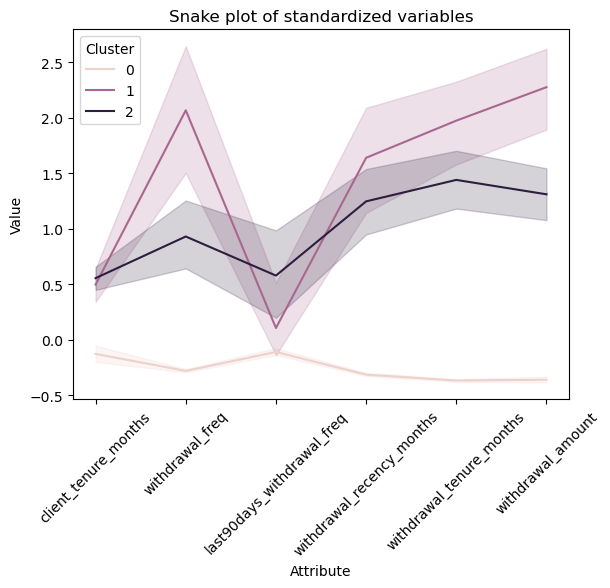

In [89]:
# Create the snake plot
plt.title("Snake plot of standardized variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=wit_pd_tbd_melted)
plt.xticks(rotation=45)
plt.show

### **Scatter Plot With Centroid**

##### **- Compute Centroids**

In [90]:
busi_centroids_3 = busi_model_3.cluster_centers_
pd.DataFrame(busi_centroids_3, columns = busi_data.columns)

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
0,-0.127343,-0.306142,-0.152002,-0.231278,-0.280700,-0.213860,-0.325549,-0.311104,-0.242009,-0.109049,...,-0.298360,-0.280515,-0.110261,-0.314482,-0.367602,-0.360541,-0.165374,-0.182762,-0.207847,-0.200894
1,0.496979,0.690944,0.136910,0.561493,0.666323,0.591147,0.685178,0.997408,0.503664,0.350995,...,1.587227,2.068706,0.106061,1.640411,1.975235,2.277088,3.593543,3.999752,4.538442,4.350046
2,0.555547,1.487134,0.800387,1.111587,1.353680,1.006229,1.596319,1.422418,1.188392,0.498173,...,1.174437,0.930803,0.578567,1.247700,1.441084,1.311186,-0.165374,-0.191302,-0.214461,-0.196285


##### **- Assign Labels**

In [91]:
df_transformed_busi_data = pd.DataFrame(transformed_busi_data)
df_transformed_busi_data['Cluster'] = busi_model_3.labels_

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Cluster
0,0.569256,2.971877,4.274620,2.890810,4.061420,-0.477899,1.788842,2.372014,2.177110,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,1.955957,-0.165374,5.197812,3.959243,3.863470,1
1,0.714134,1.563220,-0.271627,1.918321,-0.308464,0.706219,2.103688,2.447445,-0.468414,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,0
2,1.254242,3.158243,-0.271627,3.682550,1.624977,2.440921,2.237093,2.500740,-0.392690,-0.163586,...,5.693439,-0.137767,3.433339,3.538988,3.173576,9.036625,6.439728,5.388414,4.983889,1
3,1.254242,3.915373,4.973106,4.587850,-0.308464,-0.477899,2.212108,2.778176,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,4.510203,6.820098,5.388414,4.412486,1
4,1.254242,3.355955,4.146956,3.955741,-0.308464,-0.477899,2.103688,2.574337,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-2.340515,-0.482971,-0.271627,-0.407149,-0.308464,-0.477899,-0.601889,-0.438186,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,0
837,-2.340515,-0.482971,-0.271627,-0.407149,-0.308464,-0.477899,-0.601889,-0.438186,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,0
838,-2.340515,-0.482971,-0.271627,-0.407149,-0.308464,-0.477899,-0.601889,-0.438186,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,0
839,-2.340515,-0.482971,-0.271627,-0.407149,-0.308464,-0.477899,-0.601889,-0.438186,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,0


##### **- Plot 2D Scatter with Clusters**

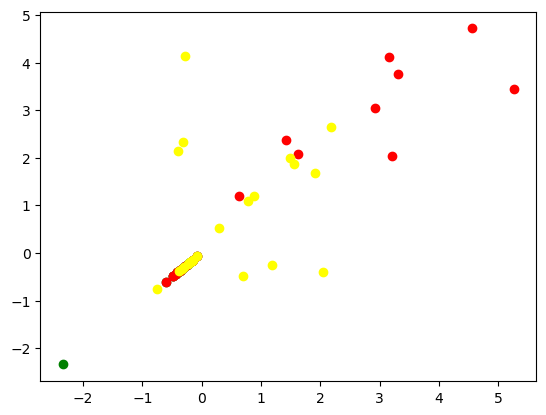

In [92]:
busi_labels = busi_model_3.predict(transformed_busi_data)

busi_label0 = transformed_busi_data[busi_labels == 0]
busi_label1 = transformed_busi_data[busi_labels == 1]
busi_label2 = transformed_busi_data[busi_labels == 2]

plt.scatter(busi_label0[-3], busi_label0[-4], color='green')
plt.scatter(busi_label1[-3], busi_label1[-4], color='red')
plt.scatter(busi_label2[-3], busi_label2[-4], color='yellow')
plt.show()

##### **- Plot 3D Scatter with Clusters**

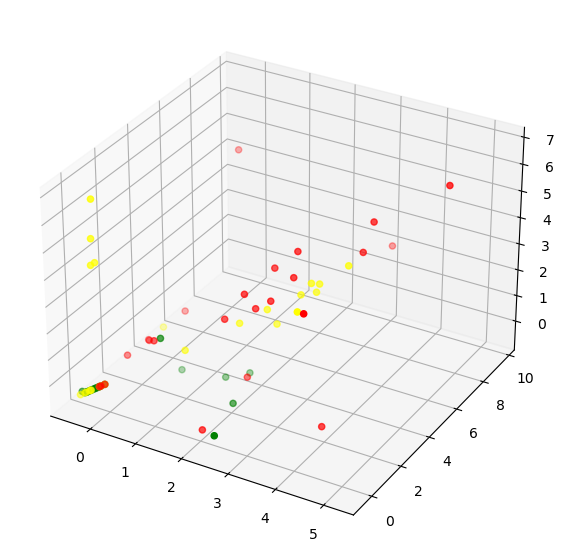

In [93]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(busi_label0[:, -3], busi_label0[:, -4], busi_label0[:, -5], color='green', label='Cluster 0')
ax.scatter(busi_label1[:, -3], busi_label1[:, -4], busi_label1[:, -5], color='red', label='Cluster 1')
ax.scatter(busi_label2[:, -3], busi_label2[:, -4], busi_label2[:, -5], color='yellow', label='Cluster 2')

ax.set_xlabel("Feature X")
ax.set_ylabel("Feature Y")
ax.set_zlabel("Feature Z")
plt.legend()
plt.show()

## Saving the Segmented Business Dataset
After segmenting business clients into clusters, the dataset is saved with meaningful labels for easy interpretation.

##### **- Create Clustered Business Dataset**

In [ ]:
labelled_busi = business_w_label_3[['client_id', 'Cluster']]
labelled_busi.head()

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
0,-0.127343,-0.306142,-0.152002,-0.231278,-0.280700,-0.213860,-0.325549,-0.311104,-0.242009,-0.109049,...,-0.298360,-0.280515,-0.110261,-0.314482,-0.367602,-0.360541,-0.165374,-0.182762,-0.207847,-0.200894
1,0.496979,0.690944,0.136910,0.561493,0.666323,0.591147,0.685178,0.997408,0.503664,0.350995,...,1.587227,2.068706,0.106061,1.640411,1.975235,2.277088,3.593543,3.999752,4.538442,4.350046
2,0.555547,1.487134,0.800387,1.111587,1.353680,1.006229,1.596319,1.422418,1.188392,0.498173,...,1.174437,0.930803,0.578567,1.247700,1.441084,1.311186,-0.165374,-0.191302,-0.214461,-0.196285


##### **- Replace Cluster Labels with Descriptive Names**

In [96]:
labelled_busi.Cluster = labelled_busi.Cluster.replace({
    0: 'Low Value Individual',
    1: 'Mid Value Individual',
    2: 'High Value Individual'
})
labelled_busi.head()


,cid,Cluster
3,3300110000,Mid Value Individual
20,5000000024,Low Value Individual
23,5000110004,Mid Value Individual
29,5000110010,Mid Value Individual
30,5000110012,High Value Individual


##### **- Save as CSV**

In [97]:
labelled_busi.to_csv('Segmented_Business_Clients.csv', index=False)

# Clustering - Personal Clients

**Drop Categorical Columnns, retaining only relevant numerical columns for clustering.**

In [ ]:
# Selecting only numerical columns (starting from persex 3)
pers_data = personal.iloc[:, 3:].copy()

# Display first few rows
pers_data.head()

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
3,19,76.0,14.0,38.0,38.0,1.0,19.0,1.531545e+08,6.943882e+04,0.0,...,1.328124e+06,1.0,1.0,1.0,1.0,2.400000e+06,1.0,10.0,10.0,5.000000e+07
20,22,13.0,0.0,13.0,0.0,3.0,28.0,2.540009e+08,7.200000e-01,0.0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
23,38,96.0,0.0,91.0,5.0,15.0,33.0,3.631322e+08,0.000000e+00,0.0,...,1.259335e+09,35.0,0.0,15.0,33.0,4.679142e+09,34.0,17.0,22.0,6.394955e+09
29,38,248.0,21.0,247.0,1.0,0.0,32.0,2.334200e+09,-4.169605e+08,0.0,...,1.120000e+09,0.0,0.0,0.0,0.0,0.000000e+00,6.0,20.0,22.0,5.387111e+08
30,38,123.0,13.0,123.0,0.0,0.0,28.0,5.948770e+08,-4.913840e+07,0.0,...,2.331668e+08,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00


## Data Transformation


### **Log Transformation**
Log transformation helps normalize skewed distributions, making data more suitable for clustering.

In [ ]:
# Perform log transformation to reduce skewness
pers_data_log = np.log(pers_data)

# Replace infinity values (caused by log transformation) with zeros
pers_data_log.replace([np.inf, -np.inf], 0, inplace=True)

# Fill any NaN values in 'available_balance' with zero
pers_data_log['available_balance'] = pers_data_log['available_balance'].fillna(0)

# Check for any remaining NaN values
pers_data_log[pers_data_log.available_balance.isna()]

c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected


### Standardization
Standardize features to have zero mean and unit variance.

In [ ]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the log-transformed data
scaler.fit(pers_data_log)

# Transform the data using the fitted scaler
transformed_pers_data = scaler.transform(pers_data_log)

# Display mean and standard deviation of transformed data
print('Mean:', transformed_pers_data.mean(axis=0).round(2))
print('Standard Deviation:', transformed_pers_data.std(axis=0).round(2))

StandardScaler()

In [ ]:
# Convert standardized data to a DataFrame for better readability
pd_trans_pers_data = pd.DataFrame(transformed_pers_data)

array([[ 0.56925624,  2.97187652,  4.2746202 , ...,  5.19781249,
         3.95924323,  3.86347003],
       [ 0.71413362,  1.56322046, -0.27162696, ..., -0.19130181,
        -0.21446087, -0.2307936 ],
       [ 1.25424237,  3.15824301, -0.27162696, ...,  6.43972806,
         5.38841418,  4.98388886],
       ...,
       [-2.34051519, -0.48297063, -0.27162696, ..., -0.19130181,
        -0.21446087, -0.2307936 ],
       [-2.34051519, -0.48297063, -0.27162696, ..., -0.19130181,
        -0.21446087, -0.2307936 ],
       [-2.34051519, -0.48297063, -0.27162696, ..., -0.19130181,
        -0.21446087, -0.2307936 ]])

In [ ]:
# Preview the transformed dataset
pd_trans_pers_data.head()

mean:  [ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0.
 -0. -0. -0.  0. -0.  0.]
std:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Cluster Analysis
### **Determine Optimal Number of Clusters**

Plot an elbow graph to identify the optimal number of clusters.

c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'SSE')

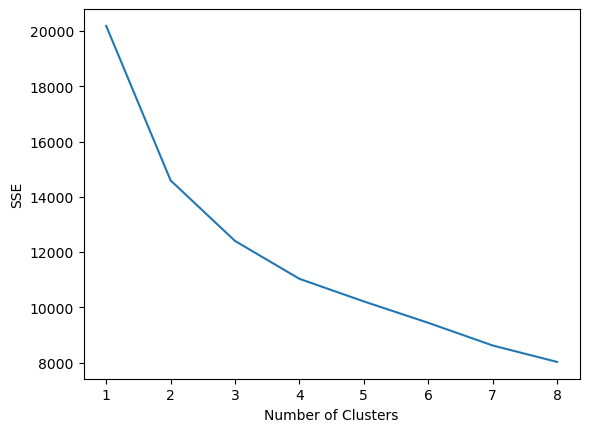

In [ ]:
# Define possible cluster counts and initialize SSE list
pers_numClusters = [1, 2, 3, 4, 5, 6, 7, 8]
pers_SSE = []  # Sum of Squared Errors (SSE)

# Compute SSE for each cluster count
for k in pers_numClusters:
    k_means = KMeans(n_clusters=k)
    k_means.fit(transformed_pers_data)
    pers_SSE.append(k_means.inertia_)

# Plot the elbow graph
plt.plot(pers_numClusters, pers_SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [ ]:
# Display SSE values per cluster
print("Clusters:", pers_numClusters)
print("SSE:", pers_SSE)

Clusters: [1, 2, 3, 4, 5, 6, 7, 8]
SSE:      [1862495.9999998515, 1431586.6889944044, 1141342.250623735, 1002784.5568967556, 894654.0221788252, 800664.1476923384, 727459.5001894056, 673742.3682514512]


### **Cluster Option 1** (2 Clusters)
#### **Apply K-Means clustering with 2 clusters.**

In [ ]:
# Train K-Means model with 2 clusters
pers_model_2 = KMeans(n_clusters=2, random_state=1)
pers_model_2.fit(transformed_pers_data)

# Extract cluster labels
pers_labels_2 = pers_model_2.labels_
len(pers_labels_2)

# Assign cluster labels to the original dataset
personal_w_label_2 = personal.copy()
personal_w_label_2 = personal_w_label_2.assign(Cluster=pers_labels_2)

# Display dataset information
personal_w_label_2.info()

# Count of personales in each cluster
print(personal_w_label_2.Cluster.value_counts(), "\n")

# Count of personales per client type
print(personal_w_label_2.client_type.value_counts())

# Compare with previous clustering results for personal clients
cluster_by_user[cluster_by_user['user_type'] == 'Personal']


c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


841

#### **Analyze Cluster Characteristics - 2 Clusters**
Calculate the average RFM (Recency, Frequency, Monetary) values for each cluster.

In [ ]:
# Compute mean values for key features in each cluster
avg_pers_w_label_2 = personal_w_label_2.groupby(['Cluster'])[
    ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
     'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
     'trade_tenure_months', 'trade_value', 'available_balance',
     'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
     'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
     'withdrawal_freq', 'last90days_withdrawal_freq',
     'withdrawal_recency_months', 'withdrawal_tenure_months',
     'withdrawal_amount', 'loan_freq', 'loan_recency_months',
     'loan_tenure_months', 'loan_value_collected']
].mean()

# Append cluster counts to the summary table
f_avg_pers_w_label_2 = avg_pers_w_label_2.assign(Count=personal_w_label_2.Cluster.value_counts())

# Format numeric display
pd.options.display.float_format = '{:,}'.format
f_avg_pers_w_label_2


<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 3 to 78492
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cid                         841 non-null    object 
 1   account_type                841 non-null    object 
 2   user_account_type           841 non-null    object 
 3   client_tenure_months        841 non-null    int64  
 4   trade_freq                  841 non-null    float64
 5   last90days_trade_freq       841 non-null    float64
 6   buy_trade_freq              841 non-null    float64
 7   sell_trade_freq             841 non-null    float64
 8   trade_recency_months        841 non-null    float64
 9   trade_tenure_months         841 non-null    float64
 10  trade_value                 841 non-null    float64
 11  available_balance           841 non-null    float64
 12  cash_advance_balance        841 non-null    float64
 13  deposit_freq                841 non-nu

##### **Visualize Cluster Characteristics**
Use a heatmap to display average feature values per cluster.

In [ ]:
plt.figure(figsize=(50, 5))
plt.title('Average Value of Features')

sns.heatmap(data=f_avg_pers_w_label_2, annot=True, cmap='RdYlGn')
plt.show()

Cluster
0    721
1    120
Name: count, dtype: int64


account_type
Investor         714
Broker-Dealer     86
Broker            19
Dealer            15
Promoter           4
Client             2
Financier          1
Name: count, dtype: int64


#### **Cluster Quartile Analysis**
Compute RFM quartiles for each cluster.

In [ ]:
# Calculate quartile values (Q1, Q2, Q3) for key features in each cluster
pers_2_seg_quart = personal_w_label_2.groupby(['Cluster'])[
    ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
     'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
     'trade_tenure_months', 'trade_value', 'available_balance',
     'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
     'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
     'withdrawal_freq', 'last90days_withdrawal_freq',
     'withdrawal_recency_months', 'withdrawal_tenure_months',
     'withdrawal_amount', 'loan_freq', 'loan_recency_months',
     'loan_tenure_months', 'loan_value_collected']
].quantile([0.25, 0.50, 0.75])

# Reset persex for visualization
pers_2_seg_quart_reset = pers_2_seg_quart.reset_persex()


,Cluster,user_account_type,Count
0,0,Corporate,702
2,1,Corporate,139


##### **Visualize Quartile Analysis**
Plot a heatmap of quartile values for each feature.

In [ ]:
plt.figure(figsize=(50, 5))
plt.title('Quartile Value of Features')

ax = sns.heatmap(data=pers_2_seg_quart_reset.pivot(persex='Cluster'), annot=True, cmap='RdYlGn')
plt.show()

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,deposit_freq,last90days_deposit_freq,deposit_recency_months,deposit_tenure_months,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Count
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,14.246879334257976,3.60748959778086,0.4174757281553398,3.274618585298197,0.332871012482663,1.5617198335644937,2.5714285714285716,"103,297,503.82030511","-5,255,151.885825243","2,361,473.6477115117",0.0651872399445215,0.015256588072122053,0.5395284327323162,0.5450762829403606,"10,724,994.46435506",0.06102635228848821,0.024965325936199722,0.10957004160887657,0.1317614424410541,"2,807,543.758488211",0.006934812760055479,0.012482662968099861,0.012482662968099861,"1,635,936.1997226074",721
1,22.708333333333332,60.81666666666667,4.433333333333334,33.05833333333333,27.758333333333333,6.633333333333334,17.816666666666666,"3,195,015,250.5205","79,924,964.12174998","8,421,187.5",4.575,0.1,11.341666666666667,14.308333333333334,"226,402,841.40458336",6.566666666666666,0.875,7.975,13.316666666666666,"994,839,598.3160001",2.825,2.783333333333333,4.791666666666667,"541,161,255.1011666",120


#### **Summarize Monetary Values per Cluster**
Sum key monetary features for each cluster.

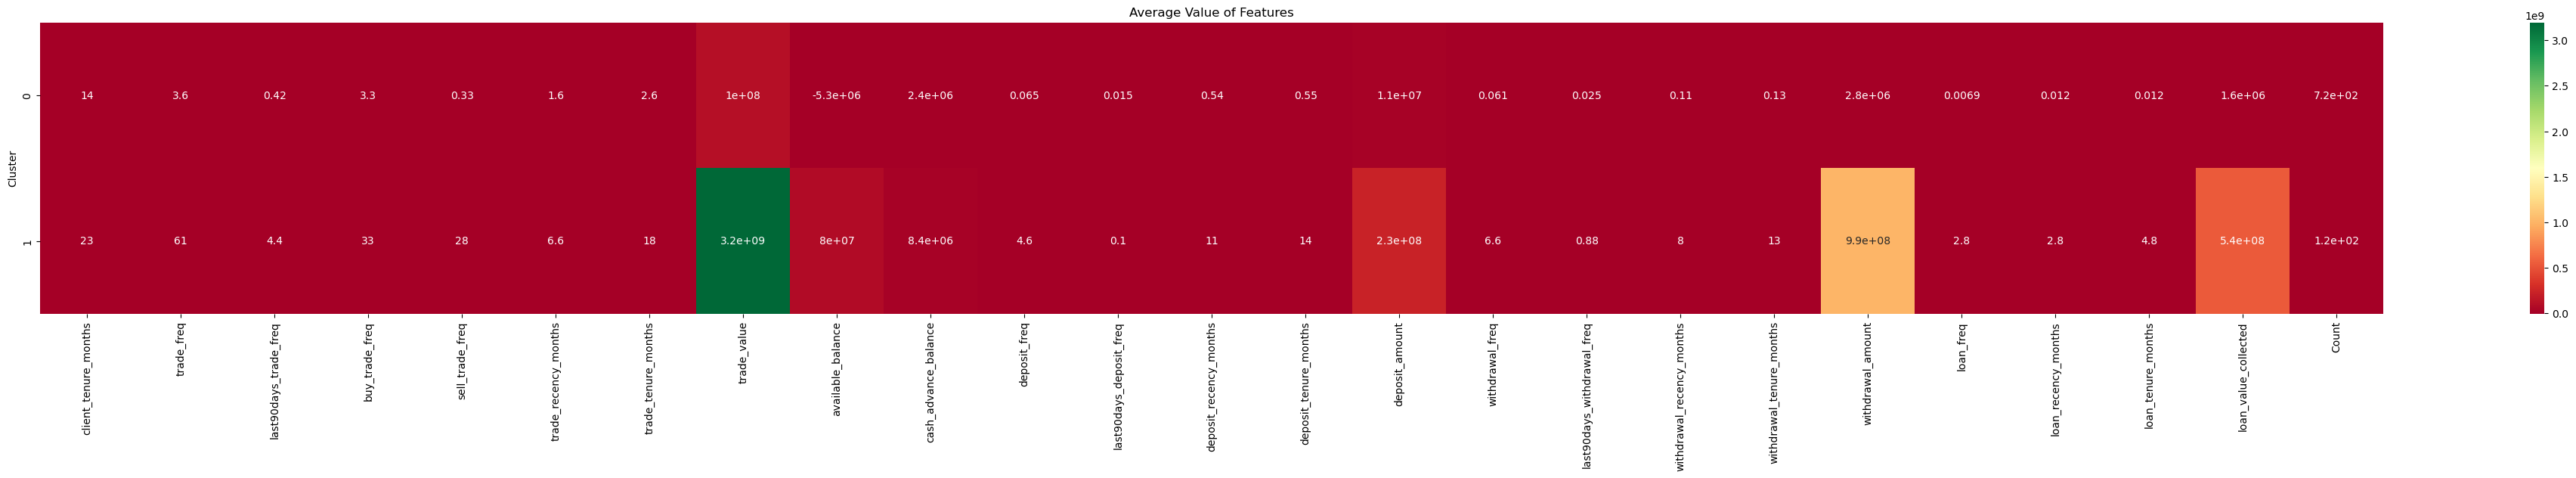

In [ ]:
sum_pers_w_label_2 = personal_w_label_2.groupby(['Cluster'])[
    ['trade_value', 'available_balance', 'cash_advance_balance', 
     'deposit_amount', 'withdrawal_amount', 'loan_freq', 
     'loan_recency_months', 'loan_value_collected']
].sum()

sum_pers_w_label_2

#### **Observations & Next Steps**
- Evidently, Cluster 1 encompasses the more active clients. While Cluster 0 encompasses the not so active clients.
- However, that doesn't necessitate that Cluster 1 is the most profitable group (moneywise), even though they have brought in the most trade value

- Let's consider the 3 clusters option, considering that the elbow chart suggested between 2 or 3 clusters. Possibly there are clients that fall between the active and not so active clients

### **Cluster Option 2** (3 Clusters)
#### **Apply K-Means clustering with 3 clusters.**

In [ ]:
# Fit KMeans model with 3 clusters
pers_model_3 = KMeans(n_clusters=3, random_state=1)
pers_model_3.fit(transformed_pers_data)
pers_labels_3 = pers_model_3.labels_

# Add cluster labels to the original dataset
personal_w_label_3 = personal.copy()
personal_w_label_3['Cluster'] = pers_labels_3

# Display dataset info
personal_w_label_3.info()

# Count of records per cluster
print(personal_w_label_3.Cluster.value_counts(), "\n")

# Count of records per client type
print(personal_w_label_3.client_type.value_counts())

# Compare with previous 2-cluster segmentation
cluster_by_user[cluster_by_user['user_type'] == 'Personal']


c:\Users\OluwatomisinSoetan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


841

#### **Analyze Cluster Characteristics - 3 Clusters**
Calculate the average RFM (Recency, Frequency, Monetary) values for each cluster.

In [ ]:
# Compute average values for key features per cluster
avg_pers_w_label_3 = personal_w_label_3.groupby('Cluster')[
    ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
     'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
     'trade_tenure_months', 'trade_value', 'available_balance',
     'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
     'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
     'withdrawal_freq', 'last90days_withdrawal_freq',
     'withdrawal_recency_months', 'withdrawal_tenure_months',
     'withdrawal_amount', 'loan_freq', 'loan_recency_months',
     'loan_tenure_months', 'loan_value_collected']
].mean()

# Add cluster size
f_avg_pers_w_label_3 = avg_pers_w_label_3.assign(Count=personal_w_label_3.Cluster.value_counts())

# Display heatmap
plt.figure(figsize=(50, 5))
plt.title('Average Value of Features')
sns.heatmap(data=f_avg_pers_w_label_3, annot=True, cmap='RdYlGn')
plt.show()


,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,deposit_freq,last90days_deposit_freq,deposit_recency_months,deposit_tenure_months,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Count
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,14.083700440528634,1.3715124816446402,0.28487518355359764,1.2687224669603525,0.1027900146842878,1.2437591776798824,1.8634361233480177,"21,915,430.996593244","-3,410,531.557444934","891,262.8487518355",0.039647577092511016,0.00881057268722467,0.3274596182085169,0.33186490455212925,"11,202,413.140088106",0.039647577092511016,0.023494860499265784,0.03671071953010279,0.05286343612334802,"2,129,996.255315712",0.007342143906020558,0.013215859030837005,0.013215859030837005,"1,732,026.4317180617",681
1,19.64864864864865,41.45945945945946,1.5405405405405406,24.243243243243242,17.216216216216218,4.45945945945946,11.216216216216216,"799,131,792.0772974","-2,027,380.0872972978","9,086,486.486486487",7.864864864864865,0.0,7.4324324324324325,11.135135135135135,"218,932,793.6008108",7.027027027027027,0.35135135135135137,6.54054054054054,11.81081081081081,"1,378,598,007.0859458",9.135135135135135,9.0,15.513513513513514,"1,752,527,043.5713513",37
2,21.78048780487805,60.41463414634146,4.7317073170731705,37.13008130081301,23.284552845528456,7.3983739837398375,18.764227642276424,"3,360,870,288.628943","66,663,546.65674797","14,390,365.853658536",2.2601626016260163,0.13821138211382114,10.178861788617887,11.967479674796747,"155,867,522.48552847",4.430894308943089,0.7642276422764228,6.252032520325203,9.91869918699187,"560,539,326.3068293",0.008130081300813009,0.008130081300813009,0.008130081300813009,"779,268.2926829269",123


#### **Cluster Quartile Analysis**
Compute RFM quartiles for each cluster.

In [ ]:
# Compute quartiles for key metrics per cluster
pers_3_seg_quart = personal_w_label_3.groupby('Cluster')[
    ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
     'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
     'trade_tenure_months', 'trade_value', 'available_balance',
     'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
     'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
     'withdrawal_freq', 'last90days_withdrawal_freq',
     'withdrawal_recency_months', 'withdrawal_tenure_months',
     'withdrawal_amount', 'loan_freq', 'loan_recency_months',
     'loan_tenure_months', 'loan_value_collected']
].quantile([0.25, 0.50, 0.75]).unstack().rename(
    columns={0.25: 'Q1', 0.50: 'Q2', 0.75: 'Q3'}
)

# Display quartile heatmap
plt.figure(figsize=(50, 5))
plt.title('Quartile Value of Features')
sns.heatmap(data=pers_3_seg_quart, annot=True, cmap='RdYlGn')
plt.show()


Cluster
0    721
1    120
Name: count, dtype: int64


account_type
Investor         714
Broker-Dealer     86
Broker            19
Dealer            15
Promoter           4
Client             2
Financier          1
Name: count, dtype: int64


#### **Monetary Value Analysis by Cluster**

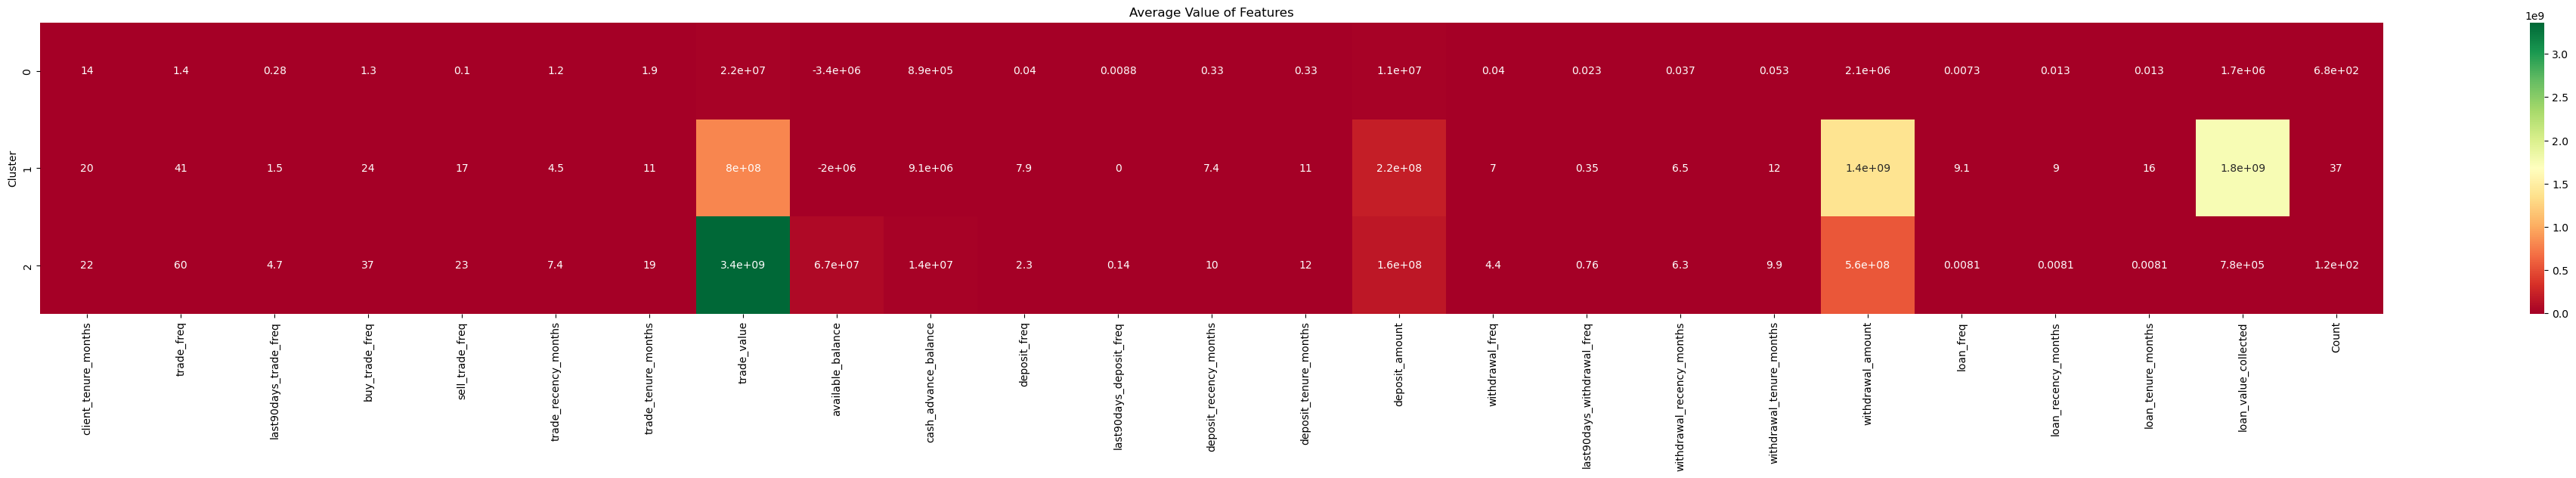

In [ ]:
# Compute total monetary values per cluster
sum_pers_w_label_3 = personal_w_label_3.groupby('Cluster')[
    ['trade_value', 'available_balance', 'cash_advance_balance',
     'deposit_amount', 'withdrawal_amount', 'loan_freq',
     'loan_recency_months', 'loan_value_collected']
].sum()

# Display high-frequency traders in Cluster 0
personal_w_label_3[personal_w_label_3.Cluster == 0].sort_values(['trade_freq']).tail(10)


#### **Cluster Insights**
- Cluster 1 are the class that just came around to check out what is happening on our exchange
- Cluster 2 gave it a little trial
- Cluster 3 are the most interested in making this work

## Result Analysis

### **Relative Importance of Segment Attributes**
To analyze the average RFM (Recency, Frequency, Monetary) values of each cluster, a cluster label column is added to the dataset.

In [ ]:
adj_personal_w_label_2 = pers_data.assign(Cluster=pers_labels_2)
adj_personal_w_label_3 = pers_data.assign(Cluster=pers_labels_3)


,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected,Cluster
3,19,76.0,14.0,38.0,38.0,1.0,19.0,1.531545e+08,6.943882e+04,0.0,...,1.0,1.0,1.0,1.0,2.400000e+06,1.0,10.0,10.0,5.000000e+07,1
20,22,13.0,0.0,13.0,0.0,3.0,28.0,2.540009e+08,7.200000e-01,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0
23,38,96.0,0.0,91.0,5.0,15.0,33.0,3.631322e+08,0.000000e+00,0.0,...,35.0,0.0,15.0,33.0,4.679142e+09,34.0,17.0,22.0,6.394955e+09,1
29,38,248.0,21.0,247.0,1.0,0.0,32.0,2.334200e+09,-4.169605e+08,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,6.0,20.0,22.0,5.387111e+08,1
30,38,123.0,13.0,123.0,0.0,0.0,28.0,5.948770e+08,-4.913840e+07,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2


#### **Cluster 2: Attribute Importance**
- Compute the cluster average and population average.
- Calculate the relative importance of each attribute for Cluster 2.

In [ ]:
pers_cluster_avg_2 = adj_personal_w_label_2.groupby('Cluster').mean()
pers_population_avg_2 = pers_data.mean()
pers_relative_imp_2 = pers_cluster_avg_2 / pers_population_avg_2 - 1
pers_relative_imp_2.round(2)


,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,deposit_freq,last90days_deposit_freq,deposit_recency_months,deposit_tenure_months,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
Cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.08,-0.69,-0.58,-0.56,-0.92,-0.32,-0.46,-0.81,-1.76,-0.27,-0.91,-0.44,-0.74,-0.78,-0.74,-0.94,-0.83,-0.91,-0.93,-0.98,-0.98,-0.97,-0.98,-0.98
1,0.47,4.17,3.48,3.39,5.54,1.90,2.75,4.87,10.59,1.61,5.46,2.66,4.45,4.70,4.46,5.64,4.98,5.47,5.62,5.89,5.91,5.82,5.90,5.88


Attributes with values further from zero indicate greater importance in defining the cluster.

##### **Visualization:**

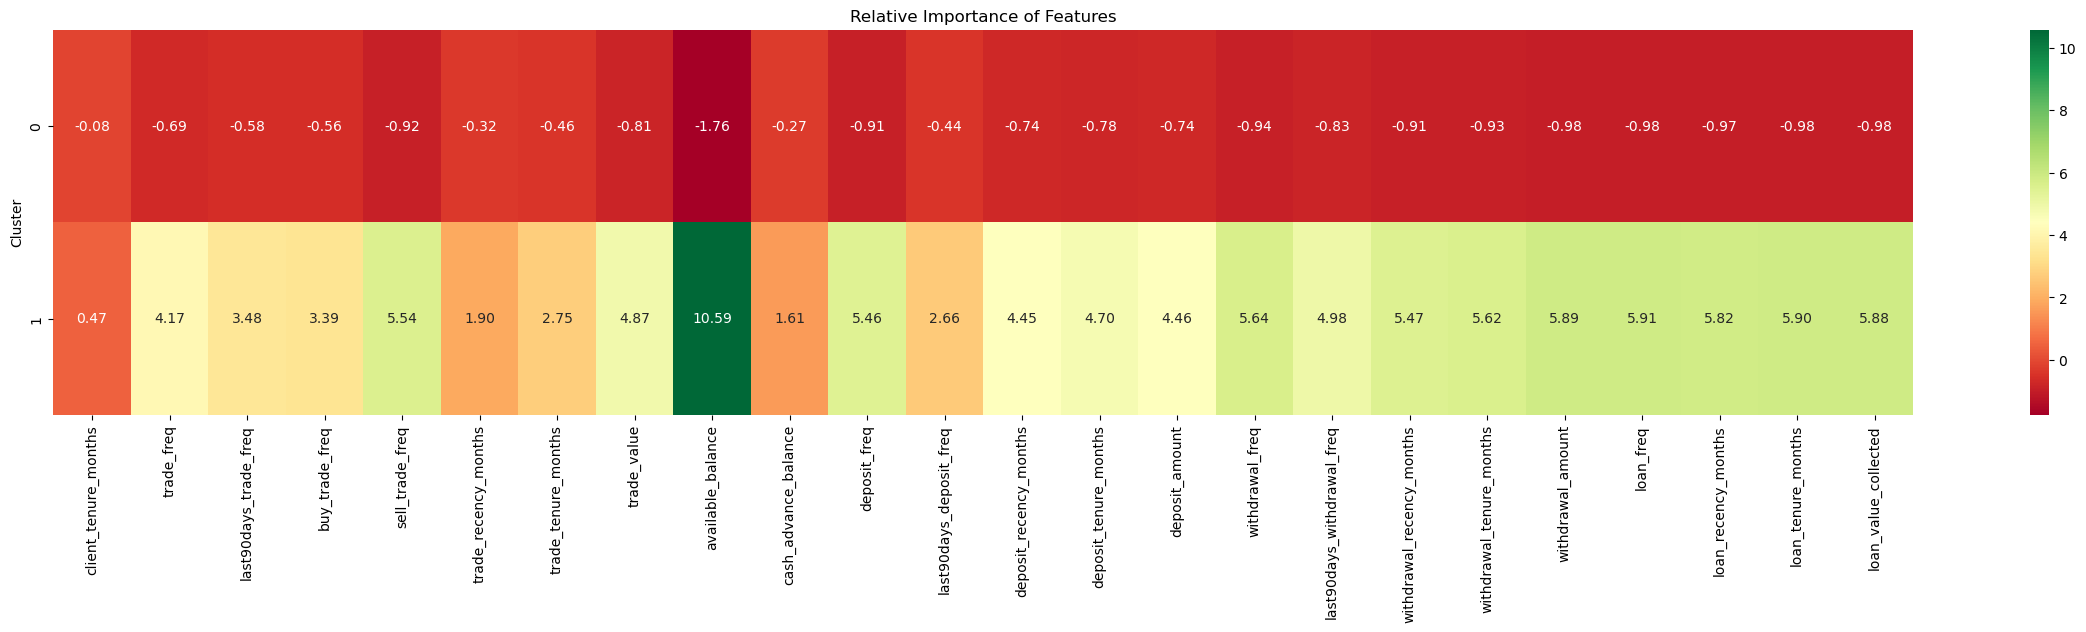

In [ ]:
plt.figure(figsize=(30, 5))
plt.title('Relative Importance of Features')
sns.heatmap(data=pers_relative_imp_2, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

#### **Cluster 3: Attribute Importance**
Perform the same calculations for Cluster 3.

In [ ]:
pers_cluster_avg_3 = adj_personal_w_label_3.groupby('Cluster').mean()
pers_population_avg_3 = pers_data.mean()
pers_relative_imp_3 = pers_cluster_avg_3 / pers_population_avg_3 - 1
pers_relative_imp_3.round(2)

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,deposit_freq,last90days_deposit_freq,deposit_recency_months,deposit_tenure_months,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
Cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.09,-0.88,-0.71,-0.83,-0.98,-0.46,-0.61,-0.96,-1.49,-0.72,-0.94,-0.68,-0.84,-0.87,-0.73,-0.96,-0.84,-0.97,-0.97,-0.99,-0.98,-0.97,-0.98,-0.98
1,0.27,2.52,0.56,2.22,3.05,0.95,1.36,0.47,-1.29,1.82,10.1,-1.0,2.57,3.44,4.28,6.1,1.4,4.31,4.87,8.55,21.33,21.07,21.34,21.29
2,0.41,4.13,3.78,3.93,4.48,2.24,2.95,5.17,8.66,3.46,2.19,4.05,3.89,3.77,2.76,3.48,4.23,4.08,3.93,2.88,-0.98,-0.98,-0.99,-0.99


##### **Visualization:**

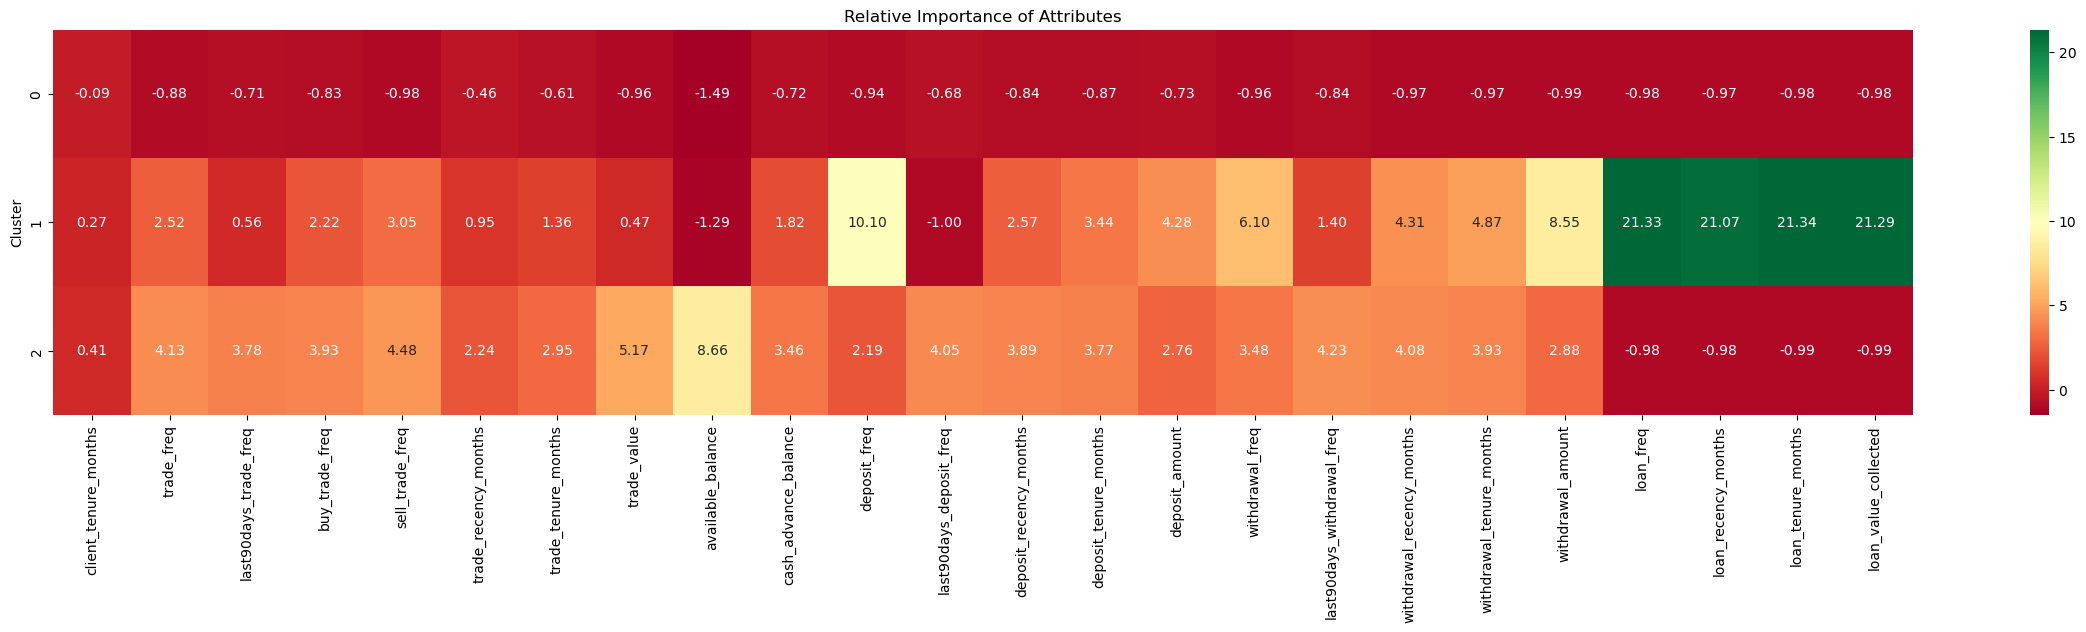

In [ ]:
plt.figure(figsize = (30,5))
plt.title('Relative Importance of Attributes')
sns.heatmap(data= pers_relative_imp_3, annot=True, fmt='.2f', cmap= 'RdYlGn')
plt.show()

### **Snake Plot Analysis**
A snake plot is generated to visualize standardized variable trends across clusters.

##### **- Prepare Data**

In [ ]:
adj_personal = personal.iloc[:, [0] + list(range(3, 27))]
adj_pers_snake = adj_personal.set_index('client_id')


Index(['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
       'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
       'trade_tenure_months', 'trade_value', 'available_balance',
       'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
       'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
       'withdrawal_freq', 'last90days_withdrawal_freq',
       'withdrawal_recency_months', 'withdrawal_tenure_months',
       'withdrawal_amount', 'loan_freq', 'loan_recency_months',
       'loan_tenure_months', 'loan_value_collected'],
      dtype='object')
24


##### **- Transform Data for Visualization**

In [ ]:
pd_trans_pers_data = pd.DataFrame(transformed_pers_data,
                                  persex = adj_pers_snake.persex,
                                  columns = adj_pers_snake.columns)

pd_tpd_labeled = pd_trans_pers_data.assign(Cluster = pers_labels_3)
pd_tpd_labeled.info()


<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 3300110000 to 9900187444
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_tenure_months        841 non-null    float64
 1   trade_freq                  841 non-null    float64
 2   last90days_trade_freq       841 non-null    float64
 3   buy_trade_freq              841 non-null    float64
 4   sell_trade_freq             841 non-null    float64
 5   trade_recency_months        841 non-null    float64
 6   trade_tenure_months         841 non-null    float64
 7   trade_value                 841 non-null    float64
 8   available_balance           841 non-null    float64
 9   cash_advance_balance        841 non-null    float64
 10  deposit_freq                841 non-null    float64
 11  last90days_deposit_freq     841 non-null    float64
 12  deposit_recency_months      841 non-null    float64
 13  deposit_tenure_months   

##### **- Melt Data for Plotting**

In [ ]:
pd_tpd_melted = pd.melt(pd_tpd_labeled.reset_persex(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars= ['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
                                        'buy_trade_freq', 'sell_trade_freq', 'trade_recency_months',
                                        'trade_tenure_months', 'trade_value', 'available_balance',
                                        'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
                                        'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
                                        'withdrawal_freq', 'last90days_withdrawal_freq',
                                        'withdrawal_recency_months', 'withdrawal_tenure_months',
                                        'withdrawal_amount', 'loan_freq', 'loan_recency_months',
                                        'loan_tenure_months', 'loan_value_collected'],
                        var_name='Attribute',
                        value_name= 'Value'
                        )

pd_tpd_melted.head()

,cid,Cluster,Attribute,Value
0,3300110000,1,client_tenure_months,0.569256
1,5000000024,0,client_tenure_months,0.714134
2,5000110004,1,client_tenure_months,1.254242
3,5000110010,1,client_tenure_months,1.254242
4,5000110012,2,client_tenure_months,1.254242


##### **- Plot Overall Snake plot**

<function matplotlib.pyplot.show(close=None, block=None)>

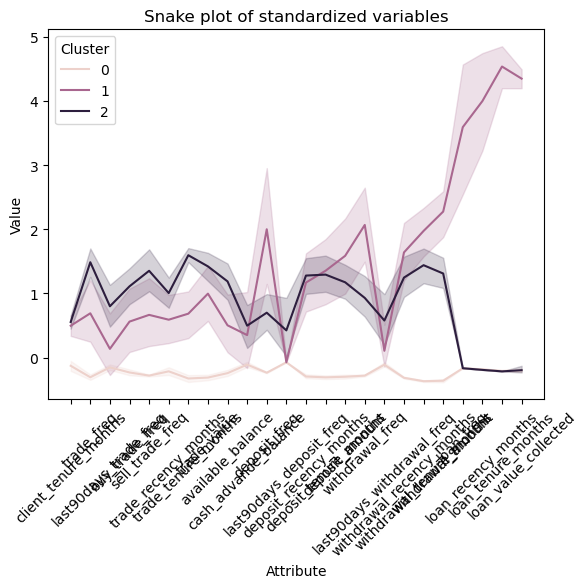

In [ ]:
plt.title("Snake plot of standardized variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=pd_tpd_melted)
plt.xticks(rotation=45)
plt.show

##### **- Segmented Snake Plots by Transaction Type**
To reduce clutter, variables are grouped by transaction type:

1. Trade


In [ ]:
trade_pd_tpd_melted = pd.melt(pd_tpd_labeled.reset_index(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars=['client_tenure_months', 'trade_freq', 'last90days_trade_freq',
                                    'trade_recency_months', 'trade_tenure_months', 'trade_value'],
                        var_name='Attribute',
                        value_name='Value')

plt.title("Trade: Snake Plot of Standardized Variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=trade_pd_tpd_melted)
plt.xticks(rotation=45)
plt.show()


,cid,Cluster,Attribute,Value
0,3300110000,1,client_tenure_months,0.569256
1,5000000024,0,client_tenure_months,0.714134
2,5000110004,1,client_tenure_months,1.254242
3,5000110010,1,client_tenure_months,1.254242
4,5000110012,2,client_tenure_months,1.254242


2. Loan

<function matplotlib.pyplot.show(close=None, block=None)>

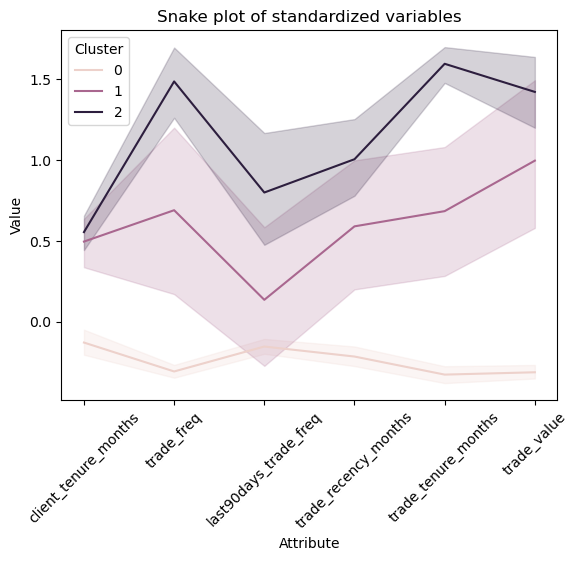

In [ ]:
loan_pd_tpd_melted = pd.melt(pd_tpd_labeled.reset_index(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars=['client_tenure_months', 'loan_freq', 'loan_recency_months',
                                    'loan_tenure_months', 'loan_value_collected'],
                        var_name='Attribute',
                        value_name='Value')

plt.title("Loan: Snake Plot of Standardized Variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=loan_pd_tpd_melted)
plt.xticks(rotation=45)
plt.show()


3. Deposit

In [ ]:
dep_pd_tpd_melted = pd.melt(pd_tpd_labeled.reset_index(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars=['client_tenure_months', 'available_balance',
                                    'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
                                    'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount'],
                        var_name='Attribute',
                        value_name='Value')

plt.title("Deposit: Snake Plot of Standardized Variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=dep_pd_tpd_melted)
plt.xticks(rotation=45)
plt.show()



,cid,Cluster,Attribute,Value
0,3300110000,1,client_tenure_months,0.569256
1,5000000024,0,client_tenure_months,0.714134
2,5000110004,1,client_tenure_months,1.254242
3,5000110010,1,client_tenure_months,1.254242
4,5000110012,2,client_tenure_months,1.254242


4. Withdrawal

<function matplotlib.pyplot.show(close=None, block=None)>

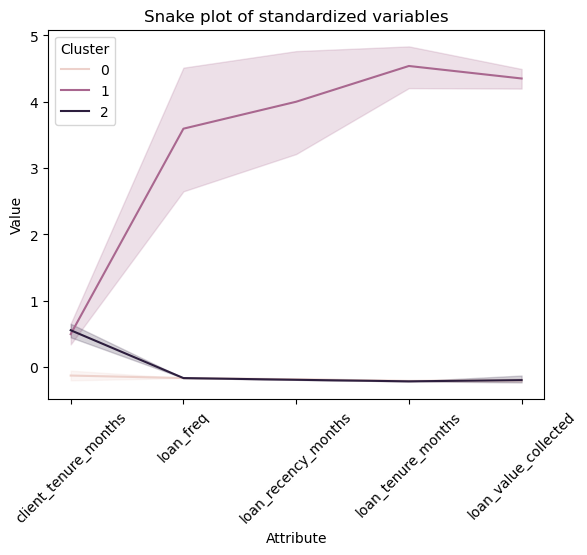

In [ ]:
wit_pd_tpd_melted = pd.melt(pd_tpd_labeled.reset_index(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars=['client_tenure_months', 'withdrawal_freq', 'last90days_withdrawal_freq',
                                    'withdrawal_recency_months', 'withdrawal_tenure_months', 'withdrawal_amount'],
                        var_name='Attribute',
                        value_name='Value')

plt.title("Withdrawal: Snake Plot of Standardized Variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=wit_pd_tpd_melted)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Deposit

dep_pd_tpd_melted = pd.melt(pd_tpd_labeled.reset_persex(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars= ['client_tenure_months', 'available_balance',
                                        'cash_advance_balance', 'deposit_freq', 'last90days_deposit_freq',
                                        'deposit_recency_months', 'deposit_tenure_months', 'deposit_amount',
                                        ],
                        var_name='Attribute',
                        value_name= 'Value'
                        )

dep_pd_tpd_melted.head()

,cid,Cluster,Attribute,Value
0,3300110000,1,client_tenure_months,0.569256
1,5000000024,0,client_tenure_months,0.714134
2,5000110004,1,client_tenure_months,1.254242
3,5000110010,1,client_tenure_months,1.254242
4,5000110012,2,client_tenure_months,1.254242


<function matplotlib.pyplot.show(close=None, block=None)>

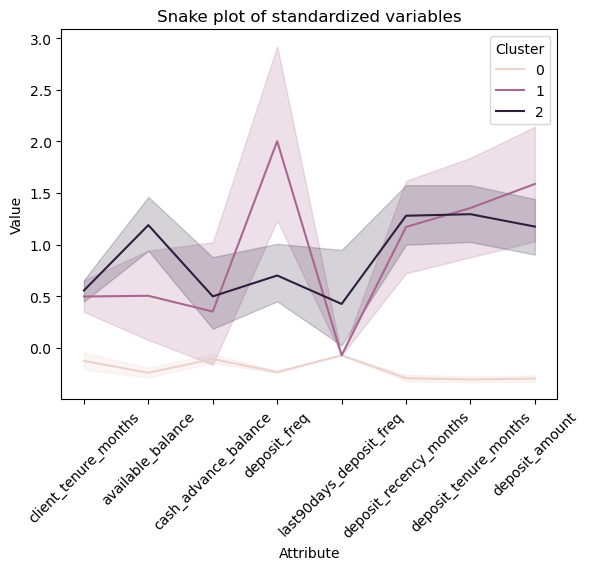

In [ ]:
# Create the snake plot
plt.title("Snake plot of standardized variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=dep_pd_tpd_melted)
plt.xticks(rotation=45)
plt.show

In [ ]:
# Withdrawal

wit_pd_tpd_melted = pd.melt(pd_tpd_labeled.reset_persex(),
                        id_vars=['client_id', 'Cluster'],
                        value_vars= ['client_tenure_months', 
                                        'withdrawal_freq', 'last90days_withdrawal_freq',
                                        'withdrawal_recency_months', 'withdrawal_tenure_months',
                                        'withdrawal_amount'],
                        var_name='Attribute',
                        value_name= 'Value'
                        )

wit_pd_tpd_melted.head()

,cid,Cluster,Attribute,Value
0,3300110000,1,client_tenure_months,0.569256
1,5000000024,0,client_tenure_months,0.714134
2,5000110004,1,client_tenure_months,1.254242
3,5000110010,1,client_tenure_months,1.254242
4,5000110012,2,client_tenure_months,1.254242


<function matplotlib.pyplot.show(close=None, block=None)>

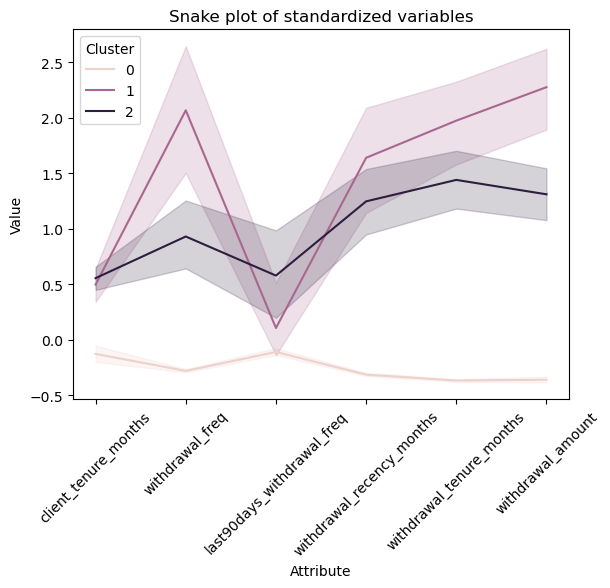

In [ ]:
# Create the snake plot
plt.title("Snake plot of standardized variables")
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=wit_pd_tpd_melted)
plt.xticks(rotation=45)
plt.show

### **Scatter Plot With Centroid**

##### **- Compute Centroids**

In [ ]:
pers_centroids_3 = pers_model_3.cluster_centers_
pd.DataFrame(pers_centroids_3, columns = pers_data.columns)

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
0,-0.127343,-0.306142,-0.152002,-0.231278,-0.280700,-0.213860,-0.325549,-0.311104,-0.242009,-0.109049,...,-0.298360,-0.280515,-0.110261,-0.314482,-0.367602,-0.360541,-0.165374,-0.182762,-0.207847,-0.200894
1,0.496979,0.690944,0.136910,0.561493,0.666323,0.591147,0.685178,0.997408,0.503664,0.350995,...,1.587227,2.068706,0.106061,1.640411,1.975235,2.277088,3.593543,3.999752,4.538442,4.350046
2,0.555547,1.487134,0.800387,1.111587,1.353680,1.006229,1.596319,1.422418,1.188392,0.498173,...,1.174437,0.930803,0.578567,1.247700,1.441084,1.311186,-0.165374,-0.191302,-0.214461,-0.196285


##### **- Assign Labels**

In [ ]:
df_transformed_pers_data = pd.DataFrame(transformed_pers_data)
df_transformed_pers_data['Cluster'] = pers_model_3.labels_

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Cluster
0,0.569256,2.971877,4.274620,2.890810,4.061420,-0.477899,1.788842,2.372014,2.177110,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,1.955957,-0.165374,5.197812,3.959243,3.863470,1
1,0.714134,1.563220,-0.271627,1.918321,-0.308464,0.706219,2.103688,2.447445,-0.468414,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,0
2,1.254242,3.158243,-0.271627,3.682550,1.624977,2.440921,2.237093,2.500740,-0.392690,-0.163586,...,5.693439,-0.137767,3.433339,3.538988,3.173576,9.036625,6.439728,5.388414,4.983889,1
3,1.254242,3.915373,4.973106,4.587850,-0.308464,-0.477899,2.212108,2.778176,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,4.510203,6.820098,5.388414,4.412486,1
4,1.254242,3.355955,4.146956,3.955741,-0.308464,-0.477899,2.103688,2.574337,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-2.340515,-0.482971,-0.271627,-0.407149,-0.308464,-0.477899,-0.601889,-0.438186,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,0
837,-2.340515,-0.482971,-0.271627,-0.407149,-0.308464,-0.477899,-0.601889,-0.438186,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,0
838,-2.340515,-0.482971,-0.271627,-0.407149,-0.308464,-0.477899,-0.601889,-0.438186,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,0
839,-2.340515,-0.482971,-0.271627,-0.407149,-0.308464,-0.477899,-0.601889,-0.438186,-0.392690,-0.163586,...,-0.299067,-0.137767,-0.331065,-0.384716,-0.405373,-0.165374,-0.191302,-0.214461,-0.230794,0


##### **- Plot 2D Scatter with Clusters**

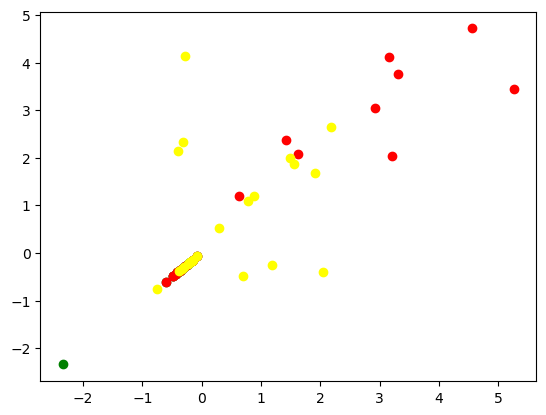

In [ ]:
pers_labels = pers_model_3.predict(transformed_pers_data)

pers_label0 = transformed_pers_data[pers_labels == 0]
pers_label1 = transformed_pers_data[pers_labels == 1]
pers_label2 = transformed_pers_data[pers_labels == 2]

plt.scatter(pers_label0[-3], pers_label0[-4], color='green')
plt.scatter(pers_label1[-3], pers_label1[-4], color='red')
plt.scatter(pers_label2[-3], pers_label2[-4], color='yellow')
plt.show()

##### **- Plot 3D Scatter with Clusters**

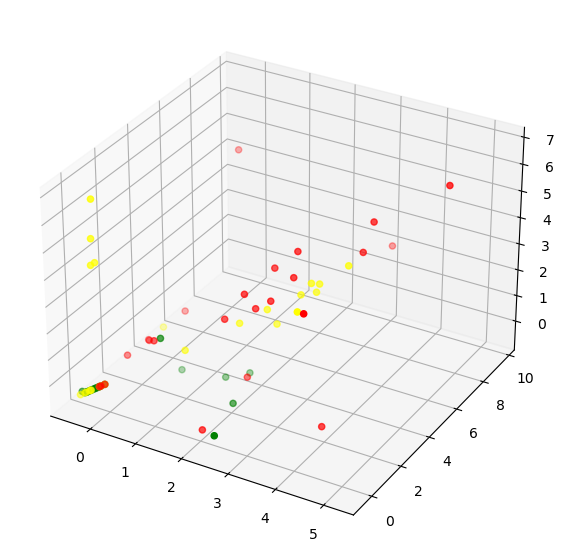

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pers_label0[:, -3], pers_label0[:, -4], pers_label0[:, -5], color='green', label='Cluster 0')
ax.scatter(pers_label1[:, -3], pers_label1[:, -4], pers_label1[:, -5], color='red', label='Cluster 1')
ax.scatter(pers_label2[:, -3], pers_label2[:, -4], pers_label2[:, -5], color='yellow', label='Cluster 2')

ax.set_xlabel("Feature X")
ax.set_ylabel("Feature Y")
ax.set_zlabel("Feature Z")
plt.legend()
plt.show()

## Saving the Segmented Personal Dataset
After segmenting personal clients into clusters, the dataset is saved with meaningful labels for easy interpretation.

##### **- Create Clustered Personal Dataset**

In [ ]:
labelled_pers = personal_w_label_3[['client_id', 'Cluster']]
labelled_pers.head()

,client_tenure_months,trade_freq,last90days_trade_freq,buy_trade_freq,sell_trade_freq,trade_recency_months,trade_tenure_months,trade_value,available_balance,cash_advance_balance,...,deposit_amount,withdrawal_freq,last90days_withdrawal_freq,withdrawal_recency_months,withdrawal_tenure_months,withdrawal_amount,loan_freq,loan_recency_months,loan_tenure_months,loan_value_collected
0,-0.127343,-0.306142,-0.152002,-0.231278,-0.280700,-0.213860,-0.325549,-0.311104,-0.242009,-0.109049,...,-0.298360,-0.280515,-0.110261,-0.314482,-0.367602,-0.360541,-0.165374,-0.182762,-0.207847,-0.200894
1,0.496979,0.690944,0.136910,0.561493,0.666323,0.591147,0.685178,0.997408,0.503664,0.350995,...,1.587227,2.068706,0.106061,1.640411,1.975235,2.277088,3.593543,3.999752,4.538442,4.350046
2,0.555547,1.487134,0.800387,1.111587,1.353680,1.006229,1.596319,1.422418,1.188392,0.498173,...,1.174437,0.930803,0.578567,1.247700,1.441084,1.311186,-0.165374,-0.191302,-0.214461,-0.196285


##### **- Replace Cluster Labels with Descriptive Names**

In [ ]:
labelled_pers.Cluster = labelled_pers.Cluster.replace({
    0: 'Low Value Individual',
    1: 'Mid Value Individual',
    2: 'High Value Individual'
})
labelled_pers.head()


,cid,Cluster
3,3300110000,Mid Value Individual
20,5000000024,Low Value Individual
23,5000110004,Mid Value Individual
29,5000110010,Mid Value Individual
30,5000110012,High Value Individual


##### **- Save as CSV**

In [ ]:
labelled_pers.to_csv('Segmented_Personal_Clients.csv', index=False)

# Conclusion & Next Steps



## Key Insights
- Customer segmentation using **RFMT analysis** revealed three distinct groups: **Low Value, Mid Value, and High Value Individuals**.  
- **High-value customers** exhibit frequent transactions with higher spending, while **low-value customers** have sporadic transactions and lower engagement.  
- The analysis identified key behavioral trends, such as **purchase frequency patterns**, **seasonal spending variations**, and **differences in transaction volumes across segments**.  
- Business customers follow a **more structured transaction pattern**, often driven by bulk purchases and long-term engagements.


  

## Business Impact
- These insights provide a **data-driven approach** to enhancing **customer retention, targeted marketing, and personalized engagement strategies**.  
- The segmentation enables businesses to **allocate resources efficiently**, focusing retention efforts on high-value customers while designing re-engagement campaigns for lower-value segments.  
- Predictive capabilities can be built on this segmentation to anticipate **customer churn, upsell opportunities, and loyalty program effectiveness**.




## Recommended Next Steps
1. **Refine Segmentation**  
   - Explore **more advanced clustering techniques** (e.g., hierarchical clustering, DBSCAN) to refine customer groupings.  
   - Incorporate **additional behavioral data** such as product preferences or customer service interactions.  

2. **Predictive Modeling**  
   - Use **RFMT scores** to train machine learning models for **churn prediction, high-value customer identification, and lifetime value estimation**.  
   - Experiment with **classification models** (e.g., logistic regression, decision trees) to identify customers at risk of disengagement.  

3. **Operational Actions**  
   - **Align marketing strategies** with segment insights, offering personalized promotions, loyalty incentives, or retention outreach.  
   - **Develop real-time dashboards** in Power BI or other visualization tools to monitor customer segment trends.  
   - **Test engagement strategies**, such as A/B testing of targeted campaigns to validate segmentation effectiveness.  